# contents
[toc]
- [python面积图之曲线图的填充](#python面积图之曲线图的填充)
- [CV](#cyclic-voltammetry铁氰化钾循环伏安法有关性质的测定)
- [双轴折线图](#python3matplotlib绘制双轴折线图(两种方法))
- [质谱图的可视化](#质谱图的可视化)
- [紫外动力学](#紫外光谱法在线测量连串反应动力学过程)

[各种笔记](https://blog.csdn.net/weixin_43959833/article/details/115919544)


## pandas
[python pandas库读取excel/csv中指定行或列数据](https://www.jb51.net/article/239125.htm)

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.random([5, 5]), columns=['A1', 'A2', 'A3','A4','A5'])
df
print("==================================")
a=df.round({'A1': 1, 'A2': 2})   #选择位数
a

'''import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df=pd.read_excel(r"F:\实验数据2022\8\26\电化学工作站\data.xlsx",sheet_name='Sheet2')
df=df.round(3)
df
'''

In [ ]:

import pandas as pd #载入pandas库
import numpy as np
import os
print("-------------------------------------")
print("|欢迎使用磁导率计算辅助工具---|")
print("-------------------------------------")
print("输入目标文件夹路径，如'C:/Users/wangc9/Desktop/'")
path = str(input(">>>"))
#读取文件
address = str(input("输入文件名，不用输入后缀! \n"))
print("---------------------------------------------------------")
address = path + address+".xls"
f = pd.ExcelFile(address)

#提取sheet名
sheetname=f.sheet_names

#删去文件中多余的sheet
for b in sheetname:
    if  "Sheet" in b:
        sheetname.remove(b)

for b in sheetname:
    if  "Sheet" in b:
        sheetname.remove(b)

print("以下是即将查找的工作表")
print(sheetname)
print("---------------------------------------------------------")
#读取需要提取的行列值
row = int(input("请输入需要提取的单元格所在行\n>>>"))
row = row - 2
line =int(input("请输入需要提取的单元格所在列\n>>>"))
line = line -1

#建立一个list来存放电感的值
mag=[]
print("---------------------------------------------------------")
#按sheet读取工作表,并将每一工作表中的特定单元格的值存储在链表mag中
print("以下是即将提取出的值")
for i in sheetname:
        df = pd.read_excel(address,sheet_name=i)
        value = df.iloc[row,line]
        print(value)
        mag.append(value)
print("---------------------------------------------------------")

#将sheet名和mag合并
me = list(zip(sheetname,mag))

#输出文件

# list转dataframe
workbook = pd.DataFrame(me,columns=['sheet名','磁通'])
# 保存到本地excel
name = str(input("输入保存文件名\n>>>"))
name = name +".xls"
print("---------------------------------------------------------")
os.chdir(path)
workbook.to_excel(name, index=False)
print("输出成功！请查看文件夹")
input("按回车键退出")


## MATPLOTLIB 

## fundamental

### 峰与峰面积

#### 峰下绘图
* https://pythonguides.com/matplotlib-fill_between/

matplotlib.pyplot.fill_between(x, y1, y2=0, where=None, 
                              interpolate=False, 
                              step=False, *, 
                              data=None, **kwargs) 

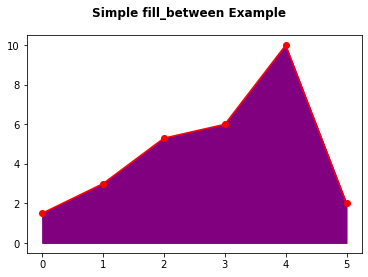

In [3]:


# Import Library

import matplotlib.pyplot as plt

# Define data coordinates

x = [0, 1, 2, 3, 4, 5]
y = [1.5, 3, 5.3, 6, 10, 2]

# Plot

plt.plot(x, y, '-o', color='red')

# fill_between

plt.fill_between(x, y,color='purple')

# Add title

plt.suptitle('Simple fill_between Example', fontweight='bold')

# Display

plt.show()

#### 找峰并标出
==可以找出来自己画==

peak_freq [3069.64  1600.16   999.042  793.146  116.309]
peak_height [9714.27992312 1896.94804702 6591.95796255 2467.44833067 4439.79458693]


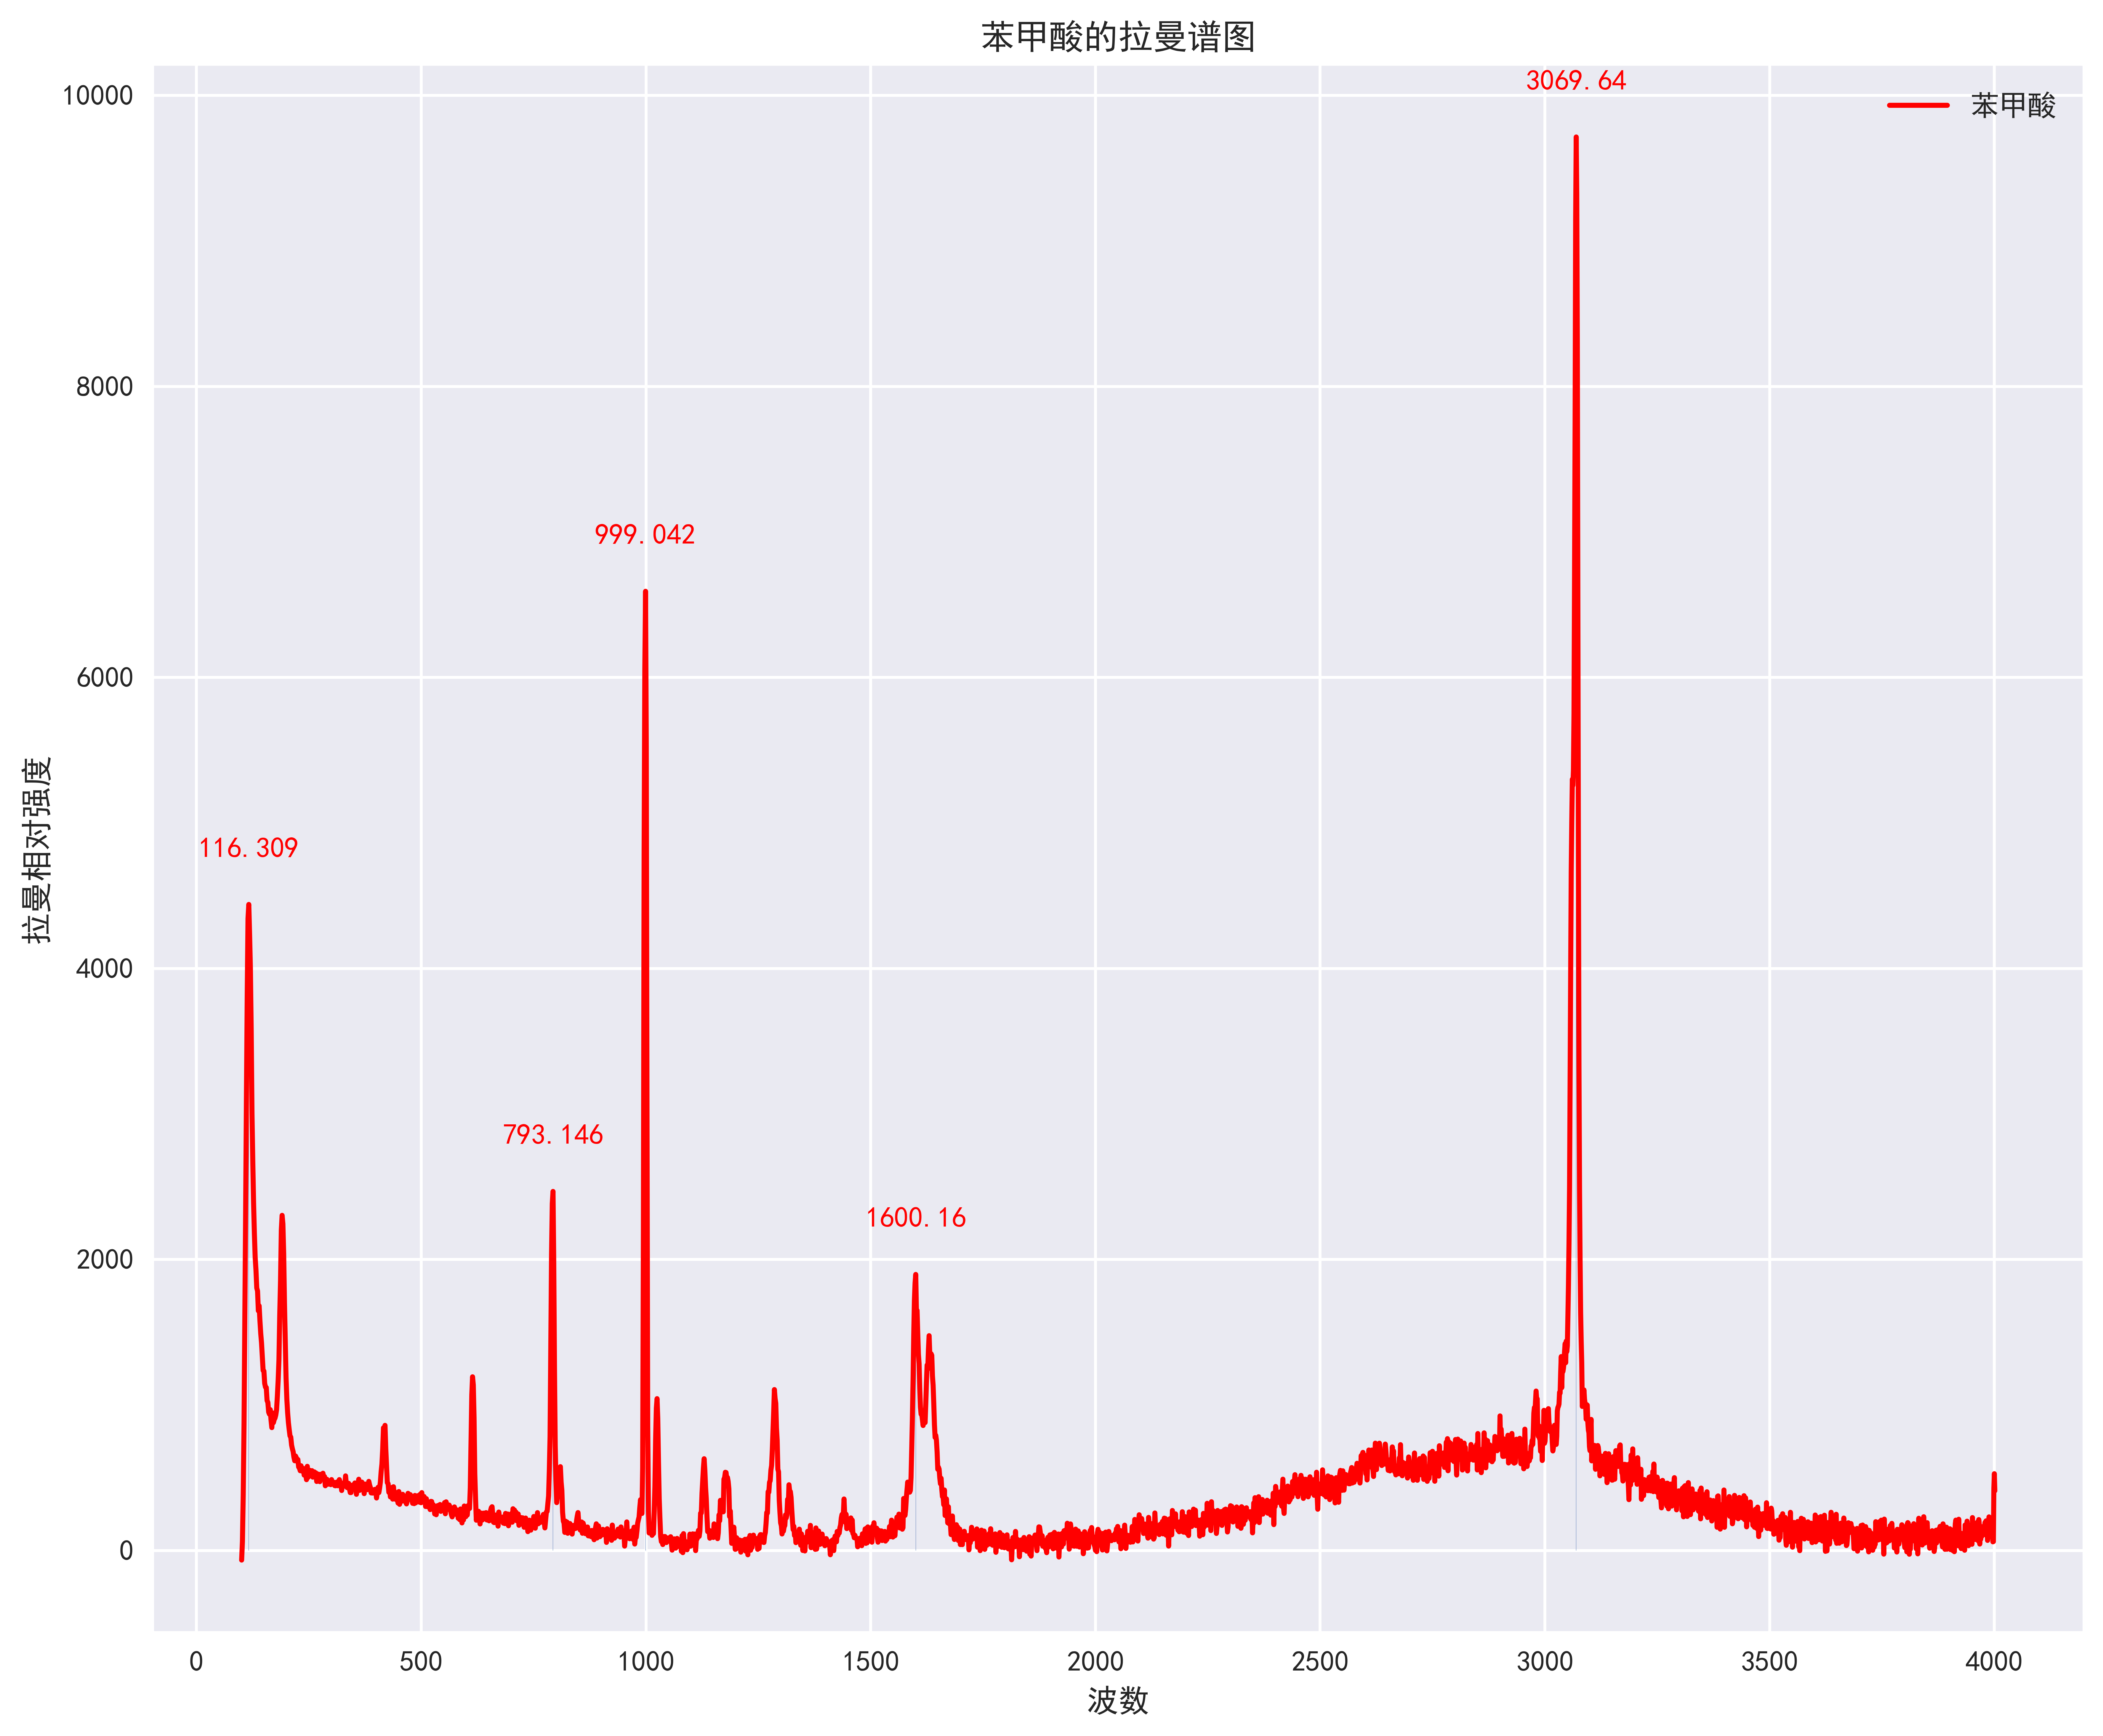

In [11]:
# -*- coding: utf-8 -*-    scipy.signal.find_peaks
"""
Created on Fri Dec 24 18:45:45 2021

@author: Lenovo
"""

import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use("seaborn")
# 制作针式搜索结果曲线
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
fig = plt.figure(figsize=(12, 10), dpi=700)  # 创建全局绘图区
X = np.loadtxt(r"D:\学习\barca\仪器分析实验\数据\raman\F-Raman\benjiasuan.txt")
x = X[:, 0]  # 波数
y = X[:, 1]  # 信号

# 已导入需要处理的数据(x,y)
from BaselineRemoval import BaselineRemoval
baseObj = BaselineRemoval(y)
y=baseObj.ModPoly()
plt.plot(x, y, 'r', label="苯甲酸")

# y 轴不可见
####   寻求特征峰！！！
from scipy.signal import find_peaks
peak_id,peak_property = find_peaks(y, height=1500, distance=100)     #更改高度强度间距 
peak_freq = x[peak_id]
peak_height = peak_property['peak_heights']
print('peak_freq',peak_freq)
print('peak_height',peak_height)
plt.bar(peak_freq,peak_height)
for peak_freq,peak_height  in zip(peak_freq,peak_height):
         plt.text(peak_freq,peak_height+300,str(peak_freq) ,ha='center',va='bottom',color="red")

#k = scipy.signal.find_peaks()

plt.xlabel("波数")
plt.ylabel("拉曼相对强度")

plt.title("苯甲酸的拉曼谱图")


plt.legend()


# plt.savefig(r"D:\学习\barca\仪器分析实验\数据\raman\raman的单图.png")

plt.show()


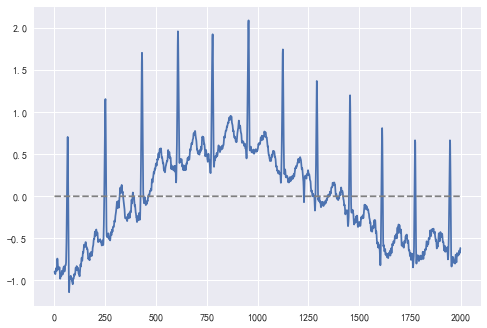

In [12]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [13]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()


NameError: name 'array' is not defined

In [14]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]
(array([1.495, 2.3  ]), array([36.93773946, 39.32723577]))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

NameError: name 'array' is not defined

### 水印logo

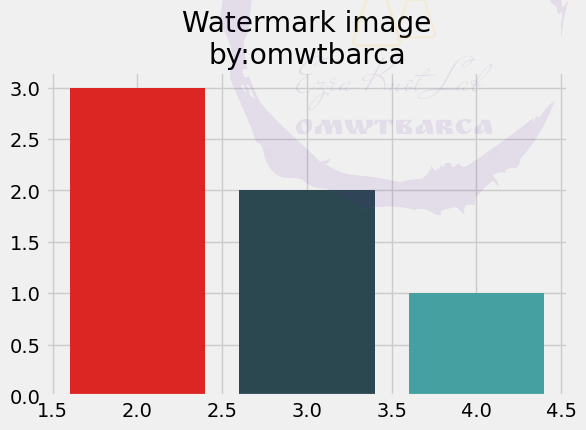

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = ['Songti SC']  #中文支持

plt.figure(dpi=100)#size=(10,5),
plt.bar([2, 3, 4], height=[3, 2, 1], color=['#dc2624', '#2b4750', '#45a0a2'])
img = plt.imread(r"D:\Desk\KCL\charts\logo\BD_T_N9W8SI50WR_G_1NS0M-removebg-preview.png")  #读入图片
'''plt.figimage(
    img,
    400,
    200,  #图片对于figure原点x,y轴方向的偏移，单位为像素
    zorder=4,
    origin='upper',  #图片朝向 'lower'
    alpha=0.9)


'''
plt.figimage(img, 200,200, zorder=22, origin='upper', alpha=0.1)
#plt.figimage(img, xo=0, yo=0, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, origin=None, resize=False) 
#plt.figimage(img, xo=0, yo=0, alpha=0.6, norm=None, cmap='ocean', vmin=4, vmax=None, origin='upper', resize=(1,1)) 

'''plt参数：这接受以下描述的以下参数：

X:此参数是图像数据。
xo, yo:这些参数是以像素为单位的x /y图像偏移量。
alpha:此参数是Alpha混合值。
norm:此参数是Normalize实例，用于将亮度映射到间隔[0，1]。
cmap:此参数是要使用的颜色图。
vmin, vmax:这些参数是颜色图的数据限制。
origin:此参数指示数组的[0，0]索引在轴的左上角或左下角的位置。
resize:此参数用于调整图形大小以匹配给定的图像大小。'''
plt.title('Watermark image\nby:omwtbarca')
plt.show()

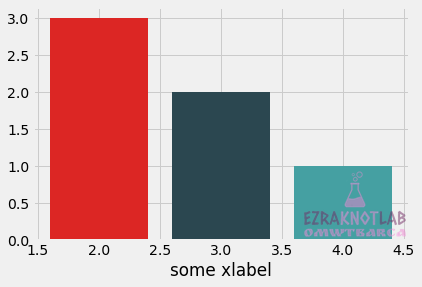

In [56]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import ( OffsetImage,AnchoredOffsetbox)

from PIL import Image
def watermark2(ax):
    img = Image.open(r"D:\Desk\KCL\charts\logo\[}{5D(5MC(%~PT)CX76MHK4.png")
    width, height = ax.figure.get_size_inches()*fig.dpi
    wm_width = int(width/4) # make the watermark 1/4 of the figure size
    scaling = (wm_width / float(img.size[0]))
    wm_height = int(float(img.size[1])*float(scaling))
    img = img.resize((wm_width, wm_height), Image.ANTIALIAS)

    imagebox = OffsetImage(img, zoom=1, alpha=0.5)
    imagebox.image.axes = ax

    ao = AnchoredOffsetbox(4, pad=0.01, borderpad=0, child=imagebox)
    ao.patch.set_alpha(0)
    ax.add_artist(ao)

fig, ax = plt.subplots()
ax.bar([2, 3, 4], height=[3, 2, 1], color=['#dc2624', '#2b4750', '#45a0a2'])
#ax.plot([1,2,3,4], [1,3,4.5,5])

watermark2(ax)
ax.set_xlabel("some xlabel")
plt.show()

### 桑基图

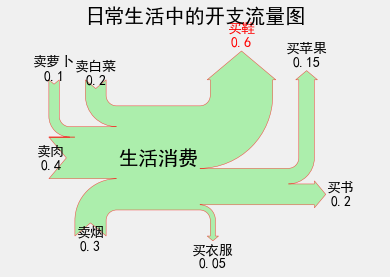

In [16]:
import  matplotlib
import  matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
 # 显示中文标识
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]
matplotlib.rcParams["axes.unicode_minus"] = False
 
 # 消费收入与支出数据
flows = [0.2,0.1,0.4,0.3,-0.6,-0.05,-0.15,-0.2]
 
 # 数据标签来源
labels = ["卖白菜","卖萝卜","卖肉","卖烟","买鞋","买衣服","买苹果","买书"]
 
 # 1表示流量显示在上方，0表示流量显示在水平位置，-1表示流量显示在下方
orientations = [1,1,0,-1,1,-1,1,0]
 
 # 通过Sankey创建一个基本的桑基图对象
sankey = Sankey()
 
 # 为桑基图添加绘制数据
sankey.add(flows=flows,                 # 收入支出数据
            labels=labels,               # 数据标签
            orientations=orientations,   # 每个数据显示在上方或者下方或者水平
            color="r",                   # 桑基图边缘线条颜色
            fc="lightgreen",             # 桑基图填充颜色
            patchlabel="生活消费",        # 桑基图标题
            alpha=0.7)                   # 桑基图透明度
 
 # 桑基图基本绘制完成对象
diagrams = sankey.finish()
diagrams[0].texts[4].set_color("r")     # 数据标签来源下标为4设置为红色
diagrams[0].texts[4].set_weight("bold") # 数据标签来源下标为4字体设置加粗
diagrams[0].text.set_fontsize(20)       # 生活消费的字号大小
diagrams[0].text.set_fontweight("bold") # 生活消费字体加粗
 
plt.title("日常生活中的开支流量图")
plt.show()

### 不同字体位置标题

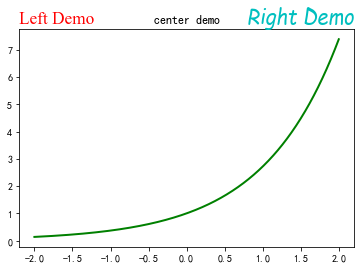

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,1000)
y = np.exp(x)

plt.plot(x,y,ls = "-",lw = 2,color = "g")

plt.title("center demo")
plt.title("Left Demo",loc = "left",
          fontdict={"size":"xx-large",
                    "color":"r",
                    "family":"Times New Roman"})
plt.title("Right Demo",loc = "right",
          size = 20,color = "c",
          style = "oblique",
          family = "Comic Sans MS")
plt.show()

### 饼图

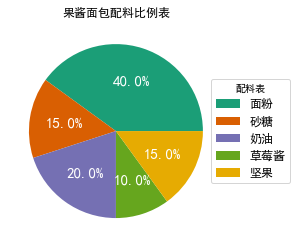

In [8]:
import matplotlib as mpl

mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import matplotlib.pyplot as plt
import numpy as np

elements = ["面粉","砂糖","奶油","草莓酱","坚果"]
weight = [40,15,20,10,15]
colors = ["#1b9e77","#d95f02","#7570b3","#66a61e","#e6ab02"]

wedges,texts,autotexts = plt.pie(weight,
                                 autopct="%3.1f%%",
                                 textprops=dict(color = "w"),
                                 colors = colors)
plt.legend(wedges,
           elements,
           fontsize = 12,
           title = "配料表",
           loc = "center left",
           bbox_to_anchor=(0.91,0,0.3,1))
plt.setp(autotexts,size = 15,weight = "bold")
plt.setp(texts,size = 12)
plt.title("果酱面包配料比例表")
plt.show()

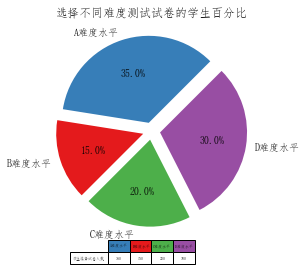

In [9]:
import matplotlib as mpl

mpl.rcParams["font.sans-serif"] = ["FangSong"]
mpl.rcParams["axes.unicode_minus"] = False

import matplotlib.pyplot as plt

labels = "A难度水平","B难度水平","C难度水平","D难度水平"

students = [0.35,0.15,0.20,0.30]

explode = (0.1,0.1,0.1,0.1)

colors = ["#377eb8","#e41a1c","#4daf4a","#984ea3"]

plt.pie(students,
        explode = explode,
        labels = labels,
        autopct = "%1.1f%%",
        startangle=45,
        shadow=False,
        colors = colors)
plt.title("选择不同难度测试试卷的学生百分比")

#将表格加入到饼图中
colLabels = ["A难度水平","B难度水平","C难度水平","D难度水平"]
rowLabels = ["学生选择试卷人数"]
studentValues = [[350,150,200,300]]
colColors = ["#377eb8","#e41a1c","#4daf4a","#984ea3"]

plt.table(cellText=studentValues,
          cellLoc="center",
          colWidths=[0.1]*4,
          colLabels=colLabels,
          colColours=colColors,
          rowLabels = rowLabels,
          rowLoc="center",
          loc="bottom")
'''
cellText:表格中的数值，将源数据按照行进行分组，每组数据
放在列表里存储，所有组数据再放在列表里储存。
cellLoc:表格中的数据对齐位置
colWidth:表格每列的宽度
colLabels:表格每列的列名称
colColours:表格中每列的列名称所在单元格的颜色
rowLabels:表格中每行的行名称
rowLoc:表格每行的行名称对齐位置
loc:表格在画布中的位置
'''
plt.show()

### 如何叠加绘制图像

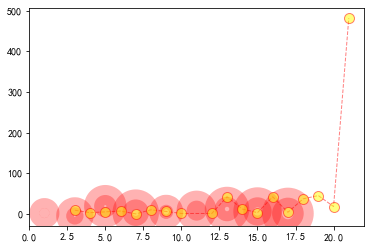

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
x = [1, 3, 5, 7, 9, 11, 13, 15, 17]
y = [2, -5, 19, 3, 5, 8, 12, 6, 1]
plt.scatter(
    x,  # x轴
    y,  # y轴
 
    color='r',  # 颜色
    marker='o',  # 样式
    linewidth=20,  # 线宽
    alpha=0.3,  # 透明度
    # 散点大小，用于绘制气泡图，在散点图的基础上又增加了一个维度
    s=[100, 300, 500, 700, 200, 400, 600, 800, 1000],  # 大小
)
date = [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
eurcny=[9, 3, 5, 7, 0, 10, 6, 1, 1, 42, 12, 3, 42, 4, 37, 45, 18, 481]
plt.plot(
    date,  # x轴数据，日期
    eurcny,  # y轴数据，收盘价
    color='r',  # 线条颜色
    linestyle='--',  # 线条风格
    linewidth=1.0,# 线条粗细
    marker='o',  # 标记风格
    markerfacecolor='#ffff00',  # 标记颜色
    markersize=10,  # 标记大小
    alpha=0.5,  # 透明度
)
plt.show()

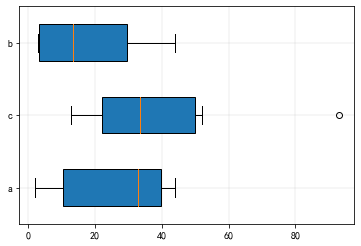

In [5]:

a = [42, 33, 33, 3, 2, 44]
b = [4, 3, 3, 23, 32, 44]
c = [52, 23, 93, 13, 22, 44]
 
plt.boxplot(
    (a, c, b),  # 数据
    labels=('a', 'c', 'b'),  # 标签
    showfliers=True,  # 是否显示异常值，默认显示
    whis=1.5,  # 指定异常值参数，默认1.5倍四分位差
    meanline=True,  # 是否用线表示平均数，默认用点
    widths=0.5,  # 柱子宽度
    vert=False,  # 默认TRUE纵向，FALSE横向
    patch_artist=True,  # 是否填充颜色
)
plt.grid(linewidth=0.2)
plt.show()


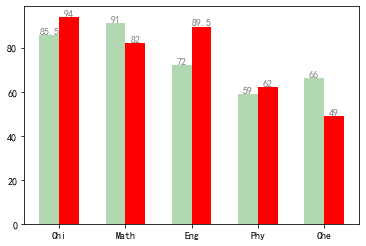

In [6]:
#男生平均分，语文/数学/英语/物理/化学
boy=[85.5,91,72,59,66]
#女生平均分
girl=[94,82,89.5,62,49]
 
#科目坐标
course=[1,2,3,4,5]
 
#绘图，男生
plt.bar(
	course,#x轴，科目
	boy,#y轴，男生成绩
	color='g',#颜色
	width=0.3,
	alpha=0.3,
)
#绘图，女生
#科目坐标
course2=[1.3,2.3,3.3,4.3,5.3]
plt.bar(
	course2,#x轴，科目
	girl,#y轴，女生成绩
	color='r',#颜色
	width=0.3,
)
 
#将数据标注在柱子上
for i,j in zip(course,boy):
	plt.text(
		i,#x轴，course学科位置
		j,#y轴，boy分数
		s=j,
		ha='center',#水平对齐
		va='bottom',#垂直对齐
		alpha=0.5,
	)
 
for i,j in zip(course2,girl):
	plt.text(
		i,
		j,
		s=j,
		ha='center',
		va='bottom',
		alpha=0.5,
	)
#科目坐标数值替换字符
course3=[1.15,2.15,3.15,4.15,5.15]
plt.xticks(course3,['Chi','Math','Eng','Phy','Che'])
plt.show()

### 图中表

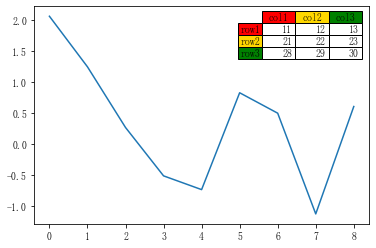

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
ax = plt.gca()
y = np.random.randn(9)

col_labels = ['col1','col2','col3']
row_labels = ['row1','row2','row3']
table_vals = [[11,12,13],[21,22,23],[28,29,30]]
row_colors = ['red','gold','green']
my_table = plt.table(cellText=table_vals, colWidths=[0.1]*3,
   rowLabels=row_labels, colLabels=col_labels,
   rowColours=row_colors, colColours=row_colors,
   loc='best')
plt.plot(y)

plt.show()

### 图中图

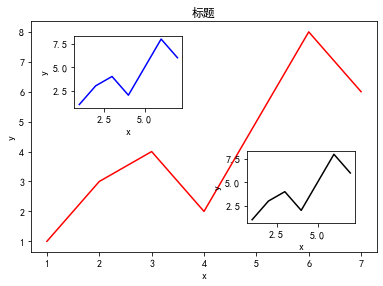

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
	
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]
	
fig = plt.figure("图中图")
	#百分比
left,bottom,width,height = 0.1,0.1,0.8,0.8
	#大图位置
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('标题')
	
	#百分比
left,bottom,width,height = 0.2,0.6,0.25,0.25
	#大图位置
ax2 = fig.add_axes([left,bottom,width,height])
ax2.plot(x,y,'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
	
	
	#百分比
left,bottom,width,height = 0.6,0.2,0.25,0.25
	#大图位置
ax3 = fig.add_axes([left,bottom,width,height])
ax3.plot(x,y,'k')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
	
	
plt.show()

### #更改颜色/大小、透明度  colors of plt.text label axis

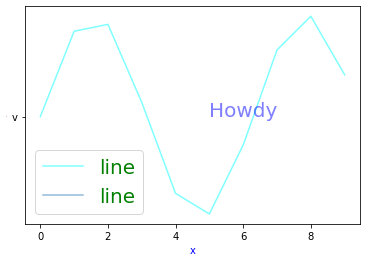

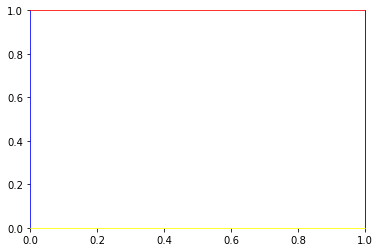

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(0,10,1)
y=np.sin(x)
plt.plot(x,y,'cyan','v',label='line',alpha=0.5)
'''
#ax=plt.figure(figsize=(8,8))

ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
plt.xaxis.label.set_color('red')
plt.yaxis.label.set_color('red')
'''



plt.xlabel('x',color='blue')
plt.ylabel('y',color='purple', fontsize=2)
plt.legend(loc='best',labelcolor='green', fontsize=20)
plt.text(5,0,'Howdy',fontsize=20,alpha=0.5,color='blue')
plt.show()
from matplotlib import pyplot as plt

ax = plt.axes()

ax.spines['bottom'].set_color('yellow')
ax.spines['top'].set_color('red')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('blue')

plt.show()

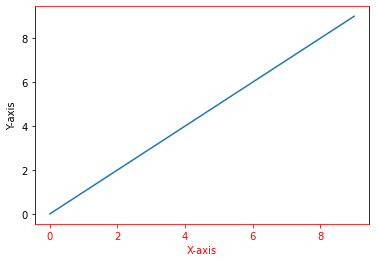

In [1]:

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(10))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')   #更改颜色

plt.show()

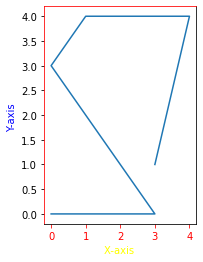

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(121)

ax.set_xlabel('X-axis ')
ax.set_ylabel('Y-axis ')

ax.xaxis.label.set_color('yellow')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('blue')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='black')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('red')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('red')         #setting up above X-axis tick color to red

plt.plot([3, 4, 1, 0, 3, 0], [1, 4, 4, 3, 0, 0])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from colorspacious import cspace_converter
plt.style.use("Solarize_Light2")  #seaborn
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
fig=plt.figure(figsize=(10,5),dpi=1000)#创建全局绘图区

df=pd.read_excel(r"F:\实验数据2022\8\26\电化学工作站\data.xlsx",sheet_name='Sheet1')
df=df.round(3)
Z1=df['Z1']




plt.subplot(1, 2, 2)

df=pd.read_excel(r"F:\实验数据2022\8\26\电化学工作站\data.xlsx",sheet_name='Sheet2')

plt.text(200,150,"Init E (V) = 0.056")

#plt.legend()
plt.title("Figure2-IMP②  ")
plt.xlabel("Z'/ohm")
plt.ylabel('-Z"/ohm')
'''
plt.xlim(20,600)
plt.ylim(0,-100)
'''

plt.tight_layout()     # 调整子图间距
plt.show()
plt.savefig(r"F:\实验数据2022\8\26\电化学工作站\IMP202208263.png")
plt.savefig(r"D:\Desk\KCL\charts\IMP202208263.png")

plt.savefig('plotname.png', transparent=True)### 保存透明图



### 渐变色

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

N = 10
np.random.seed(101)
x = np.random.rand(N)
y = np.random.rand(N)
fig, ax = plt.subplots()

path = mpath.Path(np.column_stack([x, y]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(x))
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

## python面积图之曲线图的填充

- [↩️](#contents)

[python面积图之曲线图的填充](https://www.jb51.net/article/252138.htm)

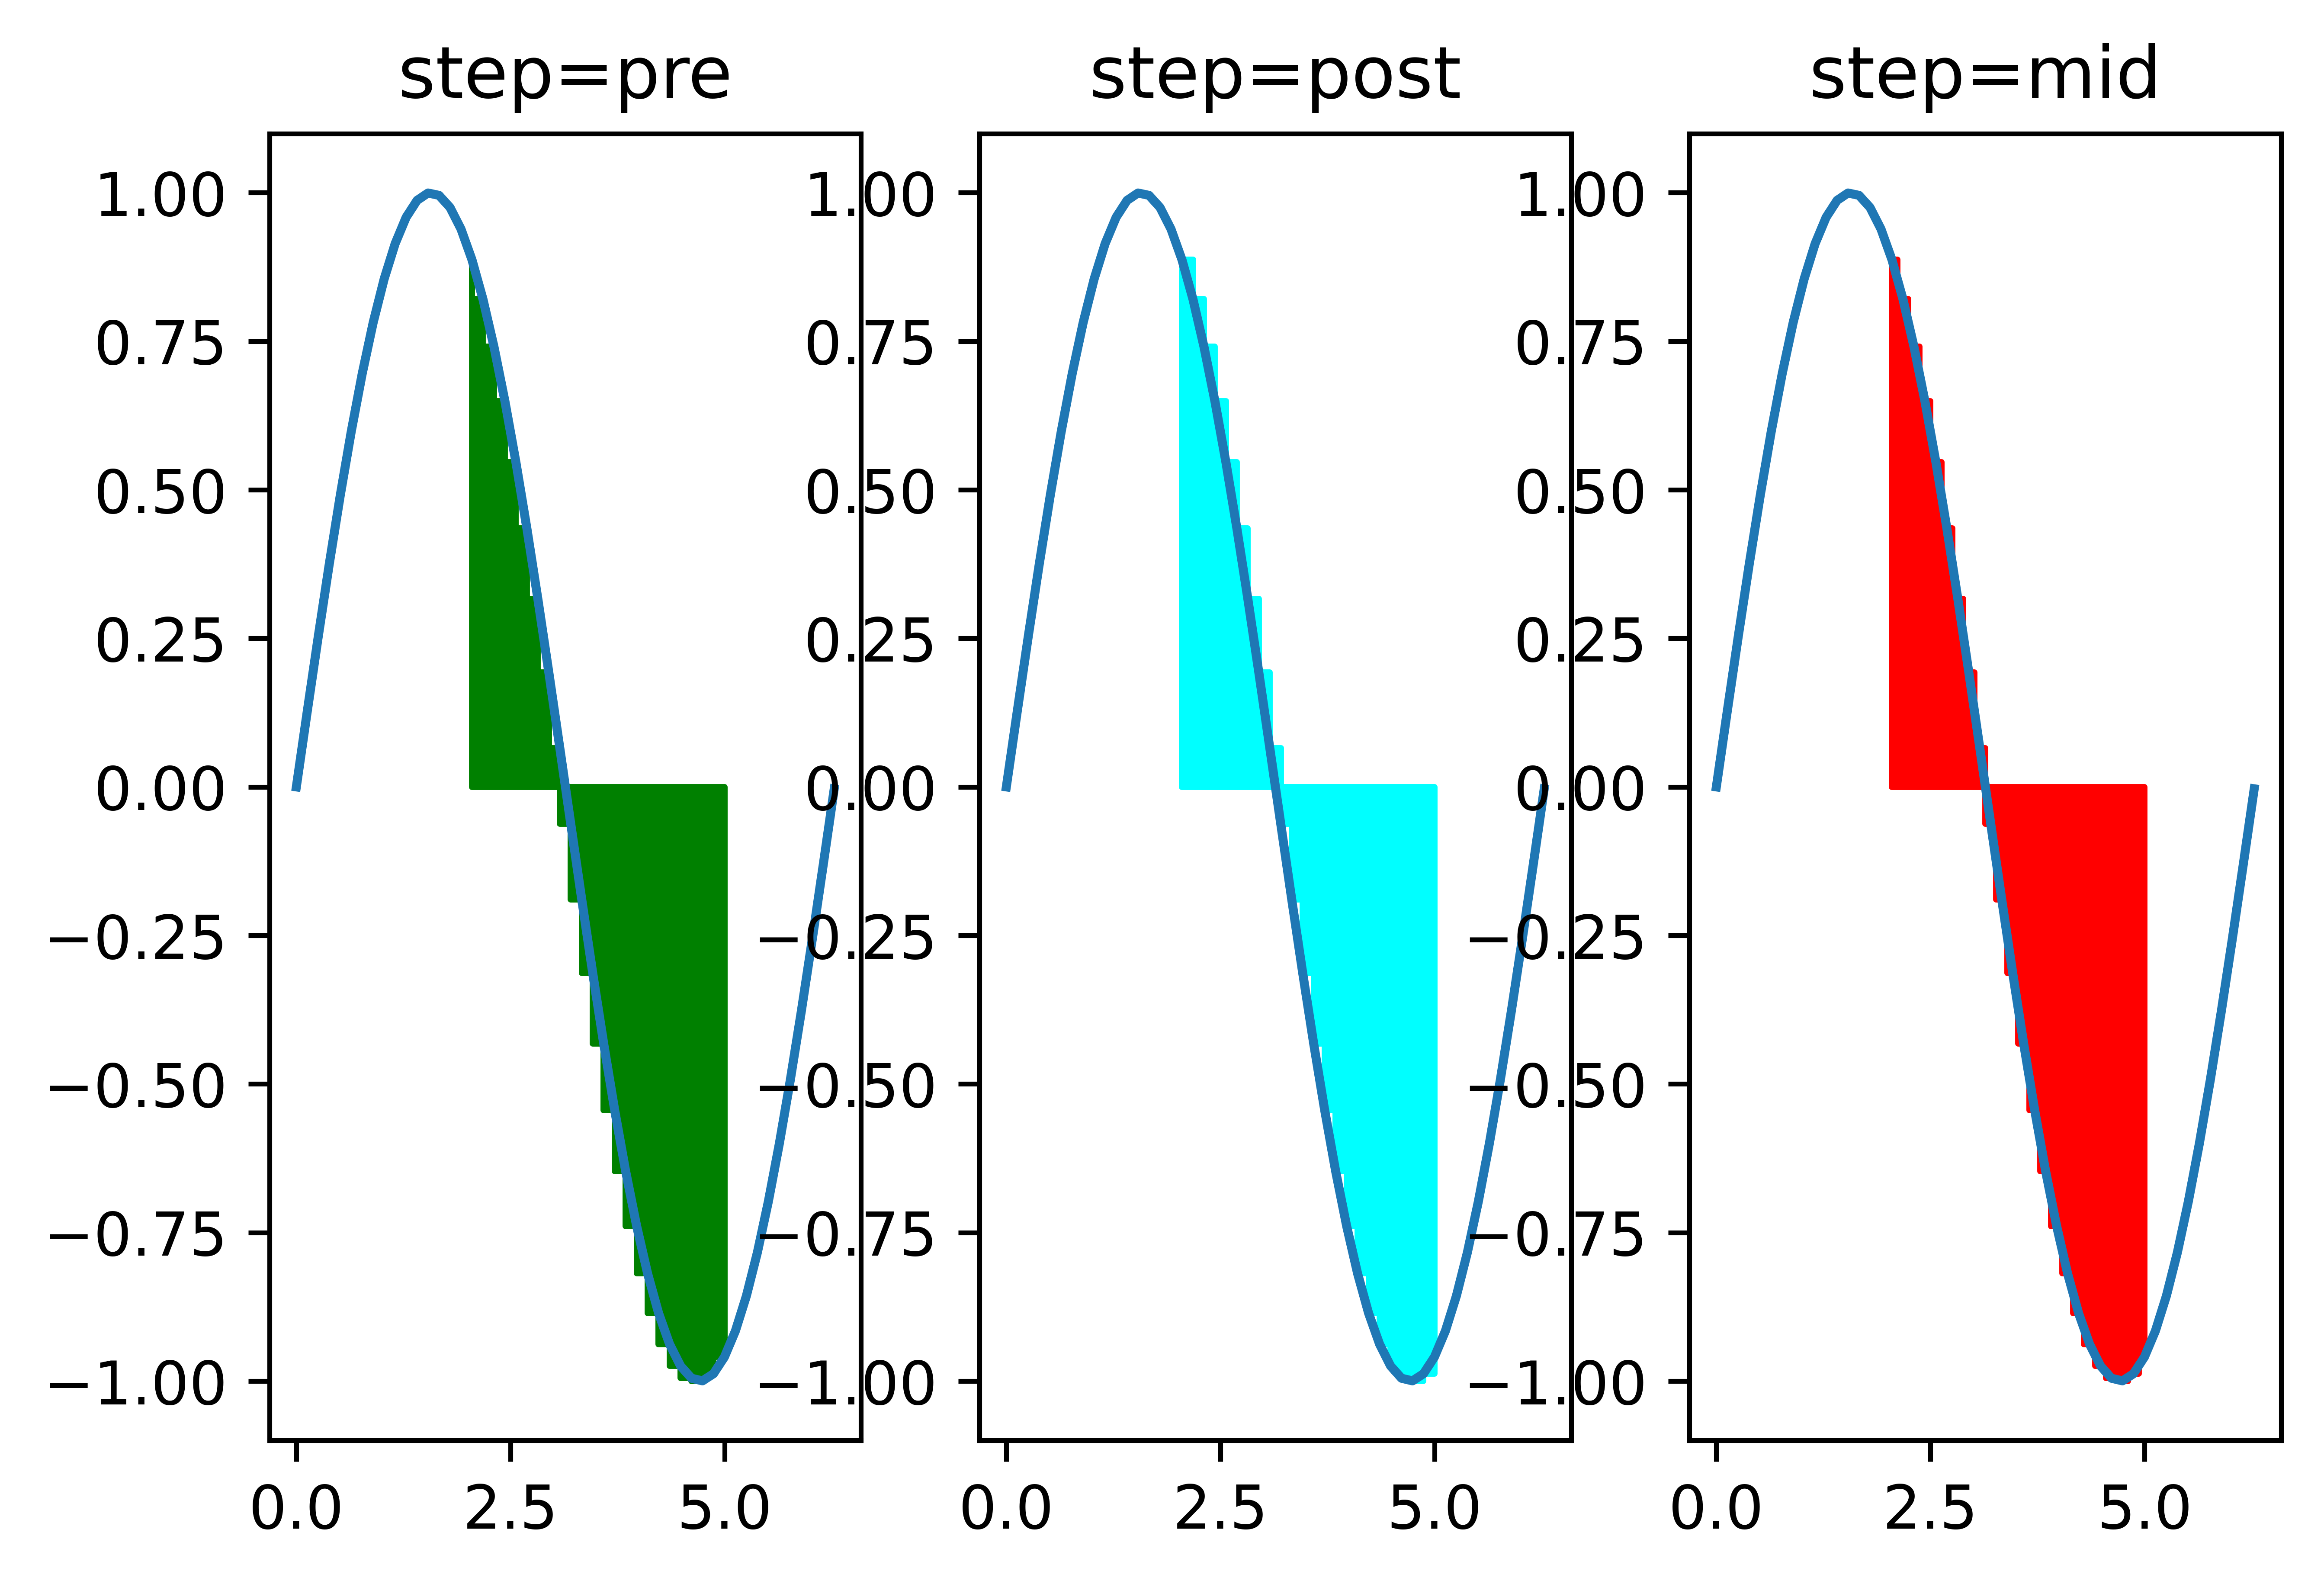

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
a = np.linspace(0,2*3.14,50) 
b = np.sin(a) 
plt.figure(dpi=1000)
plt.figsize=((12,6))
plt.subplot(131)
plt.fill_between(a, b, 0, where = (a > 2) & (a < 5), color = 'green', step='pre') 
plt.plot(a,b)
plt.title('step=pre')
 
plt.subplot(132)
plt.fill_between(a, b, 0, where = (a > 2) & (a < 5), color = 'cyan', step='post') 
plt.plot(a,b)
plt.title('step=post')
 
plt.subplot(133)
plt.fill_between(a, b, 0, where = (a > 2) & (a < 5), color = 'red', step='mid') 
plt.plot(a,b)
plt.title('step=mid')
plt.show()

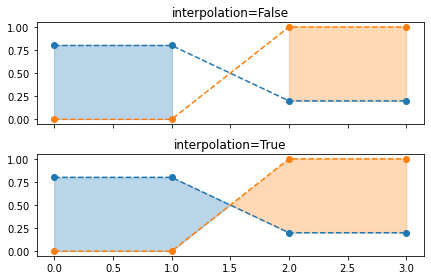

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])
 
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)
ax2.set_title('interpolation=True')
ax2.plot(x, y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3,
                 interpolate=True)
ax2.fill_between(x, y1, y2, where=(y1 <= y2), color='C1', alpha=0.3,                interpolate=True)
fig.tight_layout()


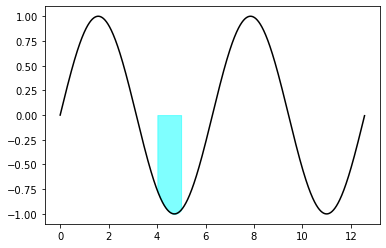

In [6]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color='black')
ax.fill_between(x, y, 0, where=(x>4)&(x<5),color='cyan', alpha=0.5)
plt.show()

<Figure size 6000x4000 with 0 Axes>

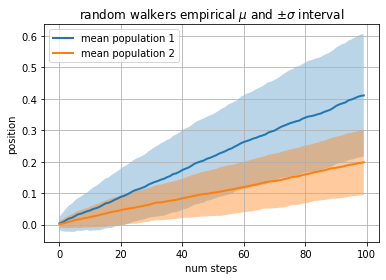

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)
# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)
# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)
# plot it!
fig=plt.figure(dpi=1000)
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1')
ax.plot(t, mu2, lw=2, label='mean population 2')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C0', alpha=0.3)  #alpha=0.3透明度！
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.4)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

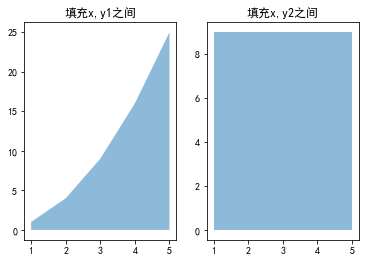

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [9, 9, 9, 9, 9]
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.fill_between(x, y1, alpha=.5, linewidth=0)
ax1.set_title('填充x,y1之间')
ax2.fill_between(x, y2, alpha=.5, linewidth=1)
ax2.set_title('填充x,y2之间')
plt.show()

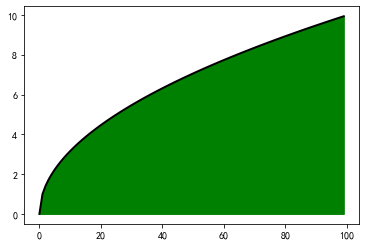

In [9]:
import matplotlib.pyplot as plt
from math import sqrt
x = range(100)
y = [sqrt(i) for i in x]
plt.plot(x,y,color='k',lw=2)
plt.fill_between(x,y,0,color='g')
plt.show()

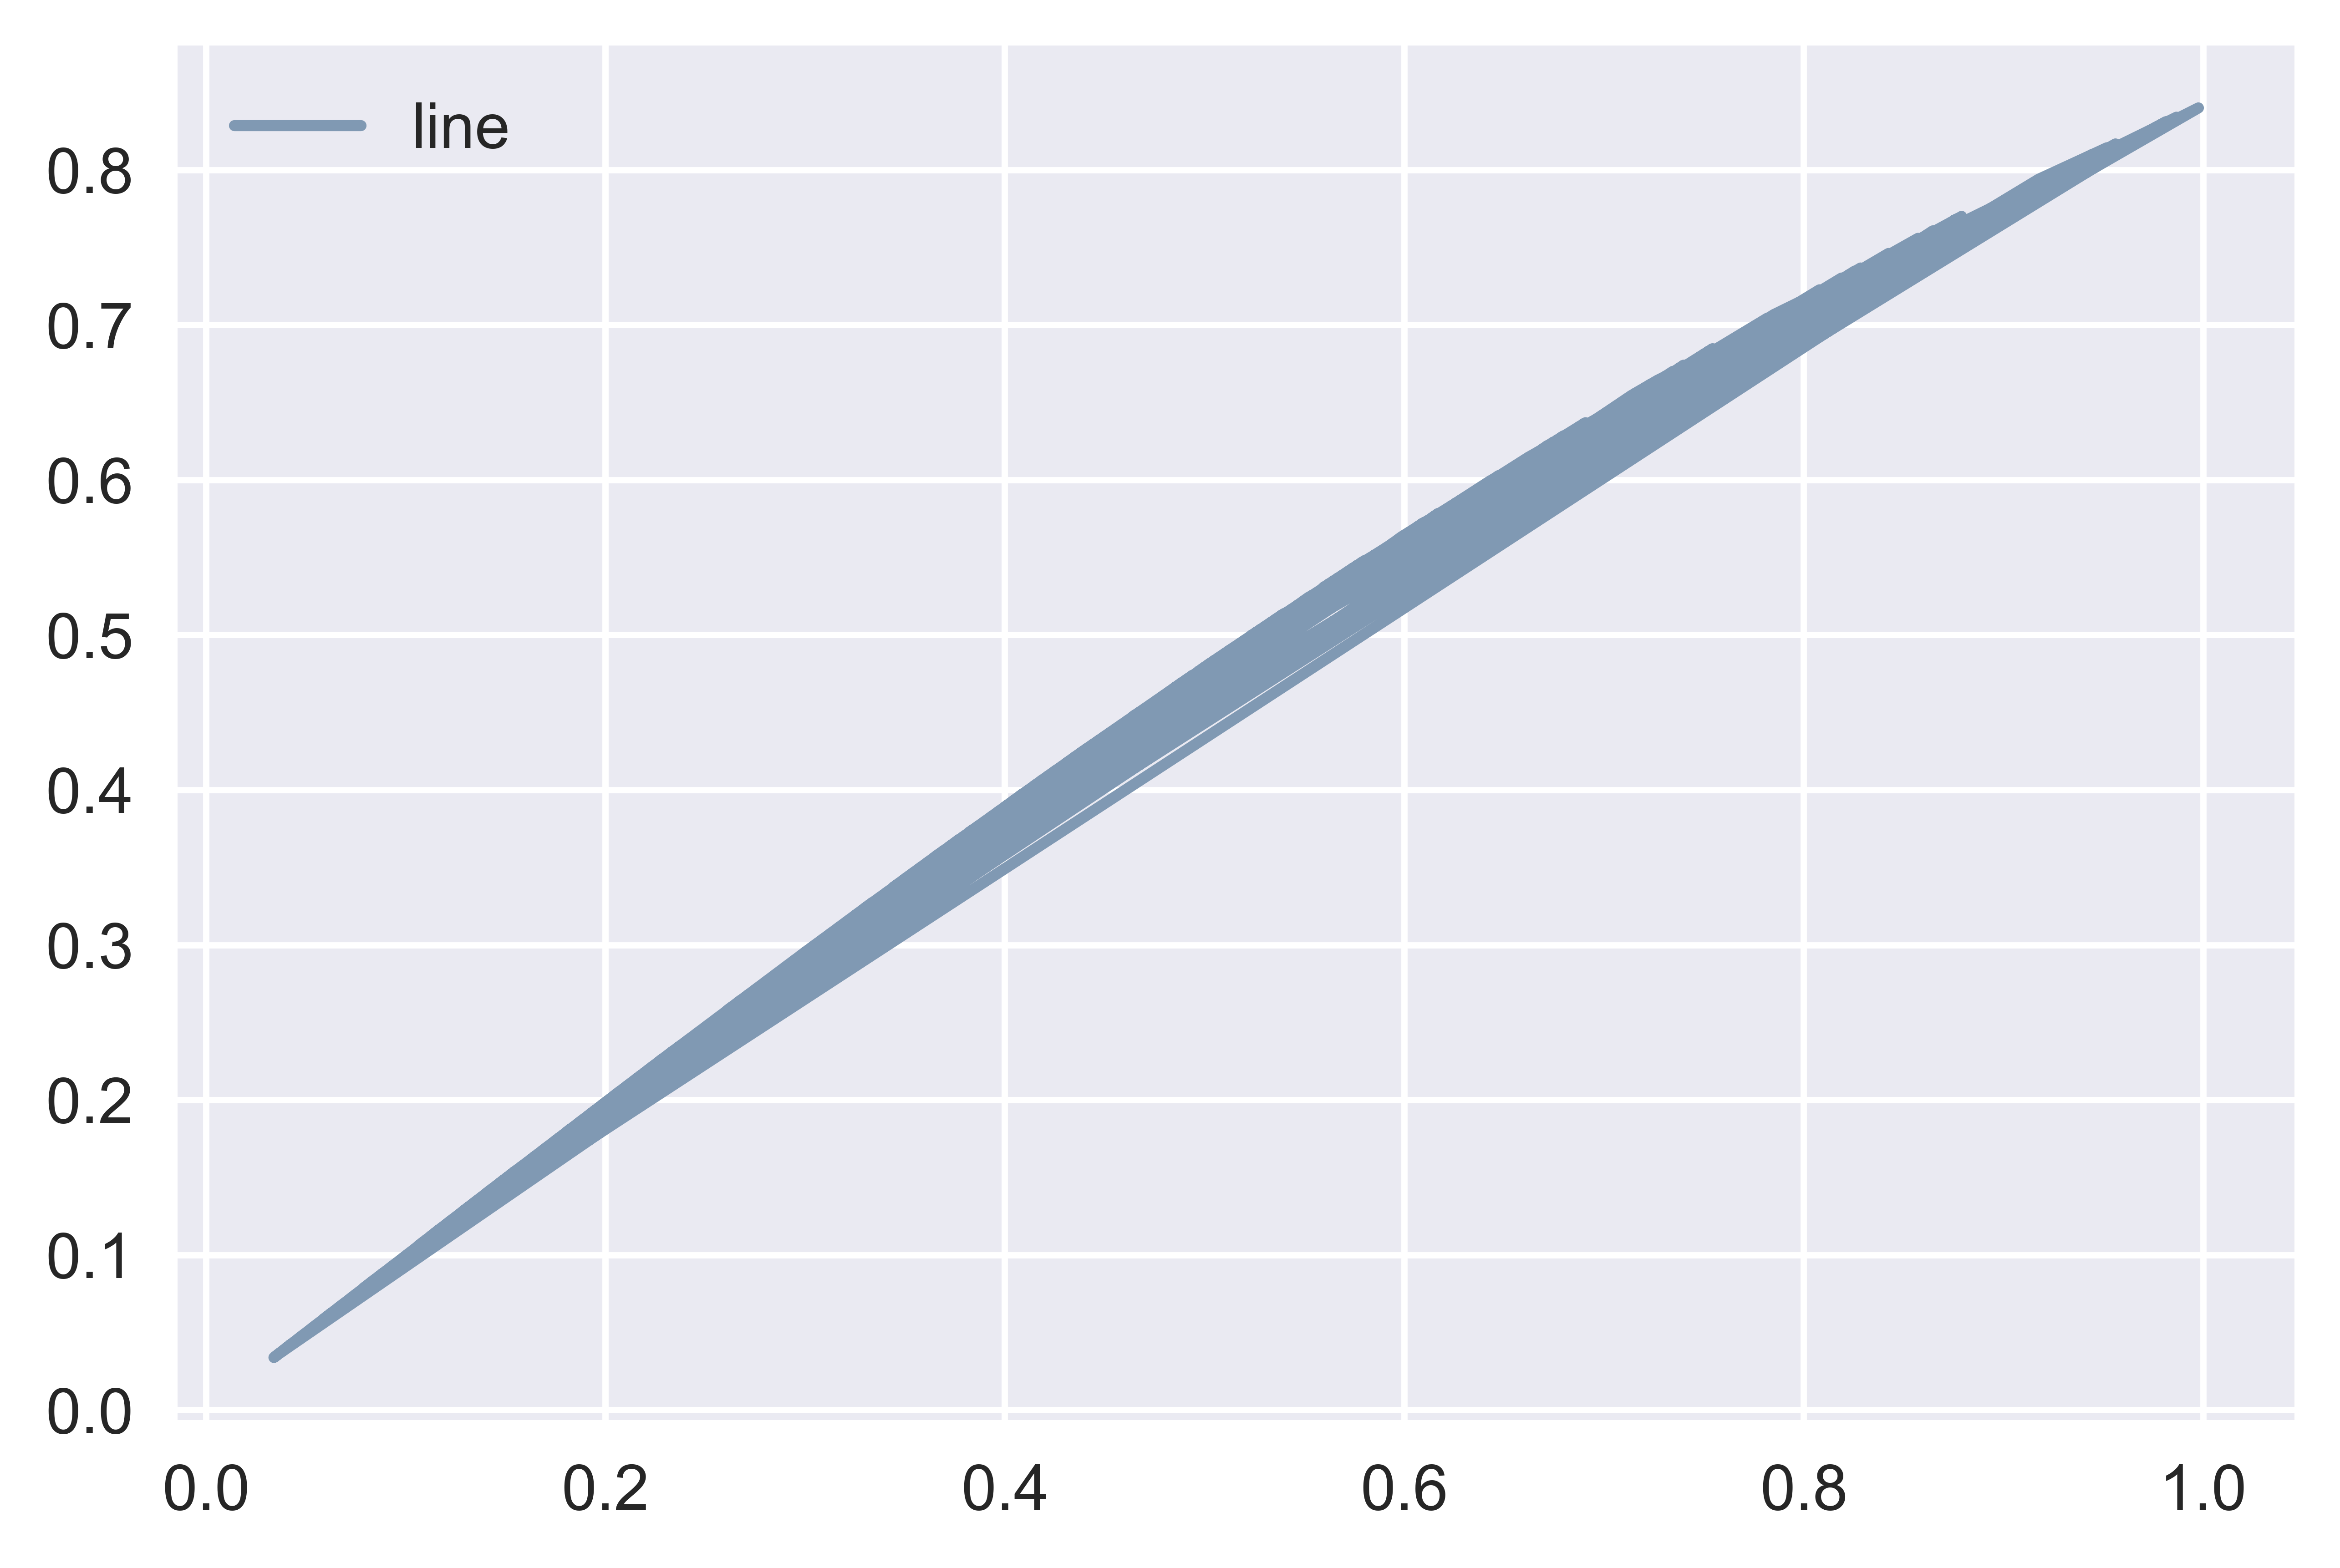

In [10]:

import numpy as np
import matplotlib.pyplot as plt
x=np.random.rand(100)
y=np.sin(x)
fig=plt.figure(dpi=1000)
plt.style.use("seaborn")
plt.plot(x,y,color=(0.5,0.6,0.7),label="line")
plt.legend()
plt.show()

## Cyclic Voltammetry铁氰化钾循环伏安法有关性质的测定

- [↩️](#contents)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 30 23:58:28 2022

Cyclic Voltammetry
"""

# 铁氰化钾循环伏安法有关性质的测定
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd





plt.style.use("Solarize_Light2")
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig=plt.figure(figsize=(10,8),dpi=1000)#创建全局绘图区


plt.subplot(2, 2, 1)



df=pd.read_excel(r"D:\学习\barca\仪器分析实验\数据\循环伏安法\text.xlsx")
v=df['x']
biao=['a','b','c','d','e','f']
biaoo=['V=10mV/s','V=20mV/s','V=40mV/s','V=80mV/s','V=100mV/s','V=120mV/s']

for i in range(0,6):
    I=df[str(biao[i])]
    plt.plot(v,I,color=(0.001*i,0.09*i,0.04*i),label=(biaoo[i]))
    


plt.legend()


plt.title("Figure1-不同扫速下电位-电流图 ")
plt.xlabel("电位Potential/V")
plt.ylabel("电流Current/A")


plt.subplot(2, 2, 2)
df=pd.read_excel(r"D:\学习\barca\仪器分析实验\数据\循环伏安法\text2.xlsx")
v=df['x']
biao=['a','b','c','e']
biaoo=['C=1mmol/L','C=2mmol/L','C=5mmol/L','C=10mmol/L']

for i in range(0,4):
    I=df[str(biao[i])]
    plt.plot(v,I,color=(0.12*i,0.004*i,0.09*i),label=(biaoo[i]))
    


plt.legend()
plt.title("Figure2-不同浓度下电位-电流图")
plt.xlabel("电位Potential/V")
plt.ylabel("电流Current/A")


plt.subplot(2, 2, 3)
V=[3.16,	4.47,	6.32	,8.94,	10.00,	10.95]   #扫速
y1=[-481.7,	-643.6,	-842.7	,-1060,	-1141,	-1168]   #还原峰电流ipc(μA)
plt.plot(V,y1,'ro',label="还原峰电流ipc(μA)") 

z= np.polyfit(V,y1,1)
xn = np.linspace( 2 , 12 , 50 )
yn = np.poly1d(z)
plt.plot( xn,yn(xn),V,y1,'ro')

  
y2=[535.2,	638.5,	853.6	,1087	,1168	,1209]  #氧化峰电流ipa(μA)
plt.plot(V,y2,'go',label="氧化峰电流ipa(μA)")
z= np.polyfit(V,y2,1)
xn = np.linspace( 2 , 12 , 50 )
yn = np.poly1d(z)
plt.plot( xn,yn(xn),V,y2,'go')

plt.title("Figure3-峰电流-扫速$\sqrt{V} $图")
plt.xlabel("扫速$\sqrt{V} $/(mV/s)")   #r"$x_0 + v_0t$" \sqrt[n]{3}
plt.ylabel("峰电流/μA")
plt.xlim(2,12)
plt.text(4,1000,"y = 90.123x + 256.45,${R^2}$ = 0.9923")
plt.text(4,-1000,"y = -89.15x - 237.85, ${R^2}$= 0.9917")



plt.subplot(2, 2, 4)

C=[1	,2	,5	,10]   
y1=[-10.40	,-17.00	,-62.40	,-148.00]   #还原峰电流ipc(μA)
plt.plot(C,y1,'ro',label="还原峰电流ipc(μA)") 

z= np.polyfit(C,y1,1)
xn = np.linspace( 0 , 12 , 50 )
yn = np.poly1d(z)
plt.plot( xn,yn(xn),C,y1,'ro')

  
y2=[23.1	,34.3,	91.1	,184.0]  #氧化峰电流ipa(μA)
plt.plot(C,y2,'go',label="氧化峰电流ipa(μA)")
z= np.polyfit(C,y2,1)
xn = np.linspace( 0 , 12 , 50 )
yn = np.poly1d(z)
plt.plot( xn,yn(xn),C,y2,'go')


plt.text(4,150,"y = 18.183x + 1.3031,${R^2}$= 0.9984")
plt.text(4,-150,"y = -15.639x + 10.924,${R^2}$ = 0.9949")

plt.xlabel("铁氰化钾浓度(mmol/L)")
plt.ylabel("峰电流/μA")
plt.title("Figure4-峰电流-浓度工作曲线")
plt.tight_layout()     # 调整子图间距


#plt.savefig(r'D:\学习\barca\仪器分析实验\数据\动力学\20211122-F\Y11的图.png')
plt.show()




## python3+matplotlib绘制双轴折线图（两种方法）
- [↩️](#contents) 

[python3+matplotlib绘制双轴折线图（两种方法）](https://blog.csdn.net/qq_42761569/article/details/123881101)
三元相图@Astro.ipynb

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#数据准备
date=["一月","二月","三月","四月","五月","六月","七月","八月"]
sales=[random.randint(10000,25000) for i in range(8)]
cost=[int(i/100)-random.randint(1,20) for i in sales]
df=pd.DataFrame(data={"销量":sales,"成本":cost},index=date)
 
#绘制第一个Y轴
fig=plt.figure(figsize=(20,8),dpi=1000)
ax=fig.add_subplot(111)
lin1=ax.plot(df.index,df["销量"],marker="o",label="sales")
ax.set_title("双Y轴图",size=20)
ax.set_xlabel("时间",size=18)
ax.set_ylabel("销量(件)",size=18)
for i,j in df["销量"].items():
    ax.text(i,j+20,str(j),va="bottom",ha="center",size=15)
 
#绘制另一Y轴    
ax1=ax.twinx()
lin2=ax1.plot(df.index,df["成本"],marker="o",color="red",label="cost")
ax1.set_ylabel("成本(元)",size=18)
 
#合并图例
lins=lin1+lin2
labs=[l.get_label() for l in lins]
ax.legend(lins,labs,loc="upper left",fontsize=15)
 
plt.show()

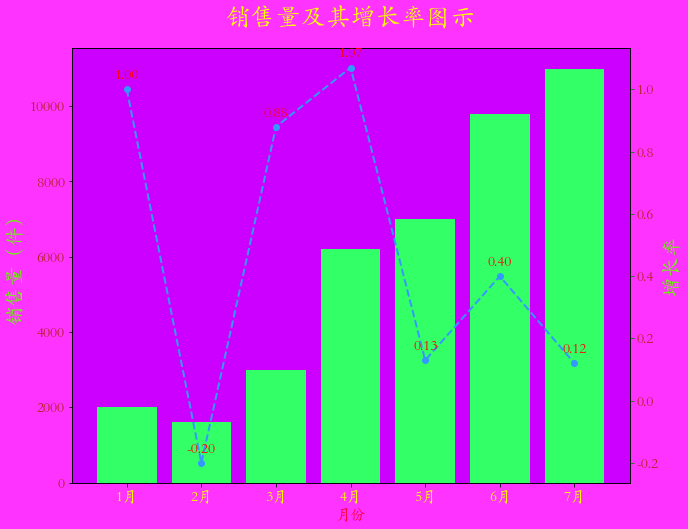

In [1]:
import matplotlib.pyplot as plt
# 生成一组数据
x = range(7)
y1 = [2000, 1600, 3000, 6200, 7000, 9800, 11000]
y2 = [1]
for i in range(len(y1)):
    if i+1 == len(y1):
        break
    rate = round(y1[i+1]/y1[i] - 1, 2)
    y2.append(rate)

fig = plt.figure(figsize=(10, 8), facecolor='#ff33ff')
# 字体使用楷体
plt.rcParams['font.sans-serif'] = ['STKAITI']
plt.rcParams['axes.unicode_minus'] = False
# 背景色为cc00ff
plt.rcParams['axes.facecolor'] = '#cc00ff'
ax1 = fig.add_subplot(111)
plt.title('销售量及其增长率图示', color='#ffff00', fontsize=25, y=1.04)
plt.xticks(x, ['1月', '2月', '3月', '4月', '5月', '6月', '7月'], color='#ffff00', fontsize=15)
plt.xlabel('月份', color='#ff0033', fontsize=15)
plt.yticks(color='#B22222', fontsize=15)
ax1.bar(x, y1, color='#33ff66', label='left')
ax1.set_ylabel('销售量（件）', color='#66ff00', fontsize=20)
# 增加一条坐标轴
ax2 = ax1.twinx()
ax2.plot(x, y2, color='#3399ff', linestyle='--', marker='o', linewidth=2)
ax2.set_ylabel("增长率", color='#66ff00', fontsize=20)
ax2.tick_params(axis='y', color='green', labelsize=15, labelcolor='#B22222')
for a, b in zip(x, y2):
    plt.text(a, b+0.02, '%.2f' % b, ha='center', va='bottom', fontsize=15, color='red')
plt.show()

## 质谱图的可视化
- [↩️](#contents)

[质谱图的可视化](https://mobiusklein.github.io/ms_deisotope/docs/_build/html/visualization.html)

* [ms_deisotope’s documentation](https://mobiusklein.github.io/ms_deisotope/docs/_build/html/index.html)

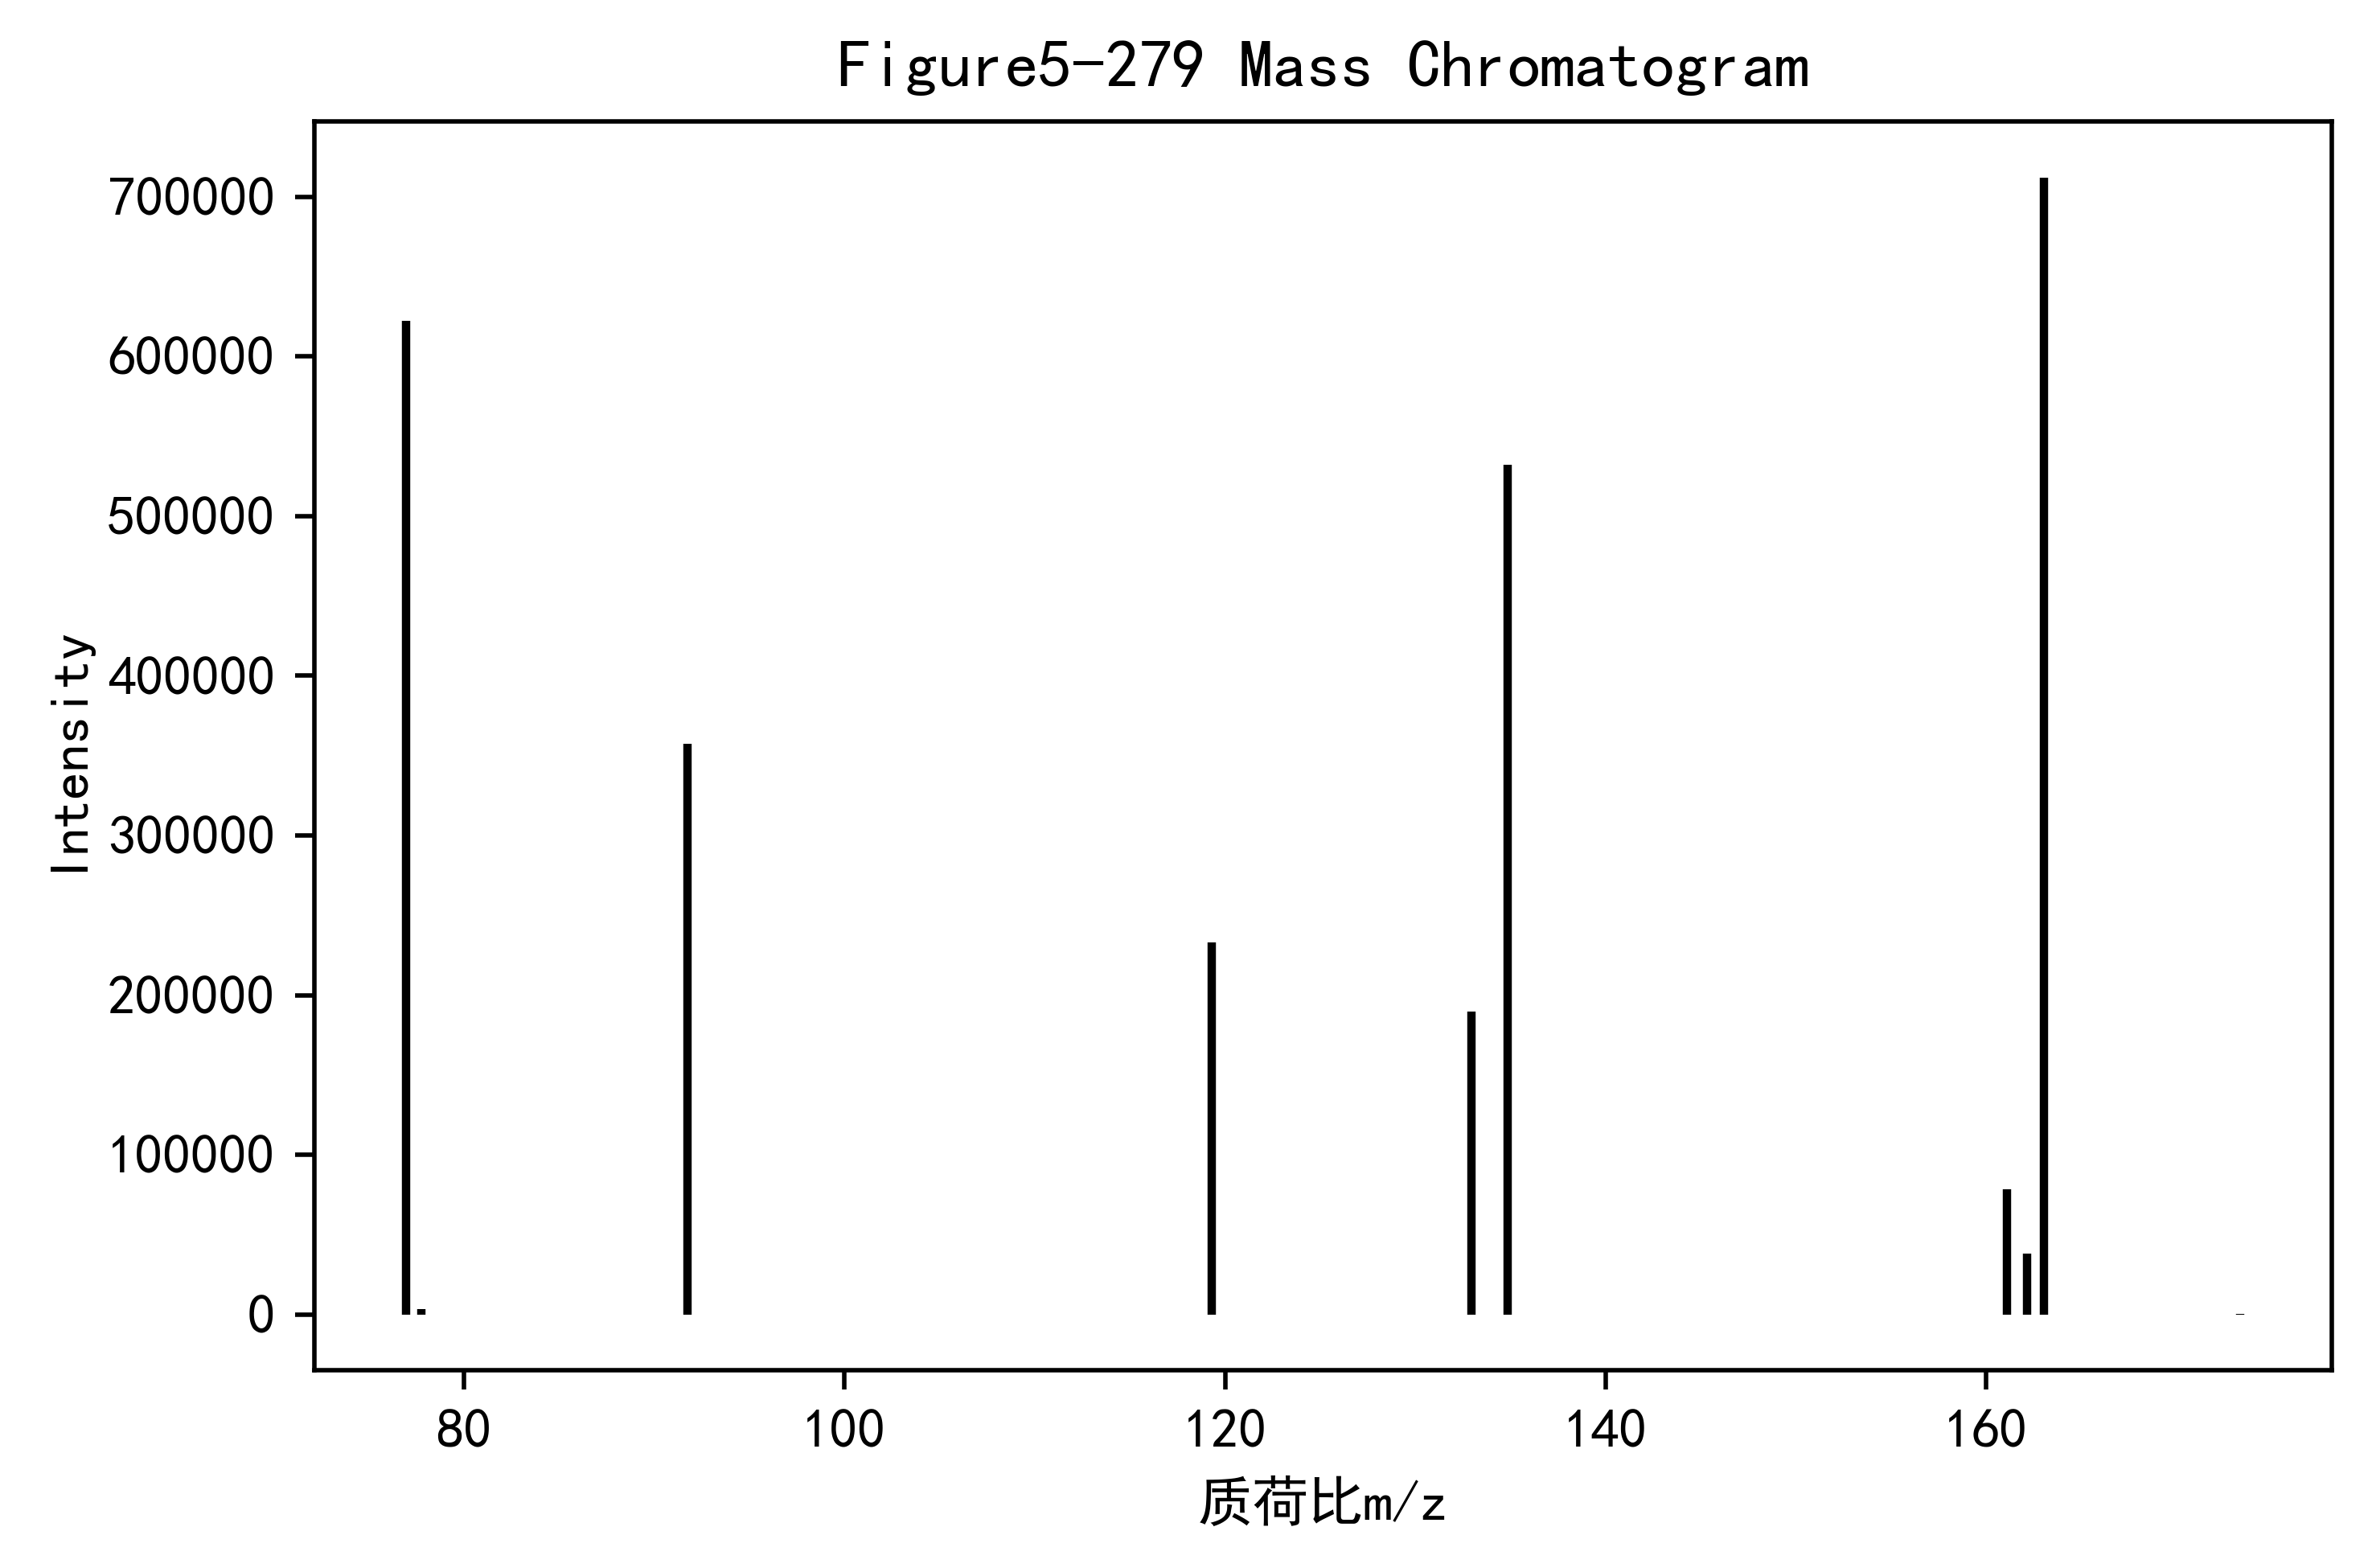

x= [ 76.961  77.777  91.738 119.289 132.945 134.824 161.094 162.121 163.027
 173.332]
y= [[7.69610e+01 6.22100e+05]
 [7.77770e+01 3.67500e+03]
 [9.17380e+01 3.57250e+05]
 [1.19289e+02 2.32900e+05]
 [1.32945e+02 1.89950e+05]
 [1.34824e+02 5.32200e+05]
 [1.61094e+02 7.87000e+04]
 [1.62121e+02 3.84250e+04]
 [1.63027e+02 7.11700e+05]
 [1.73332e+02 6.19000e+02]]


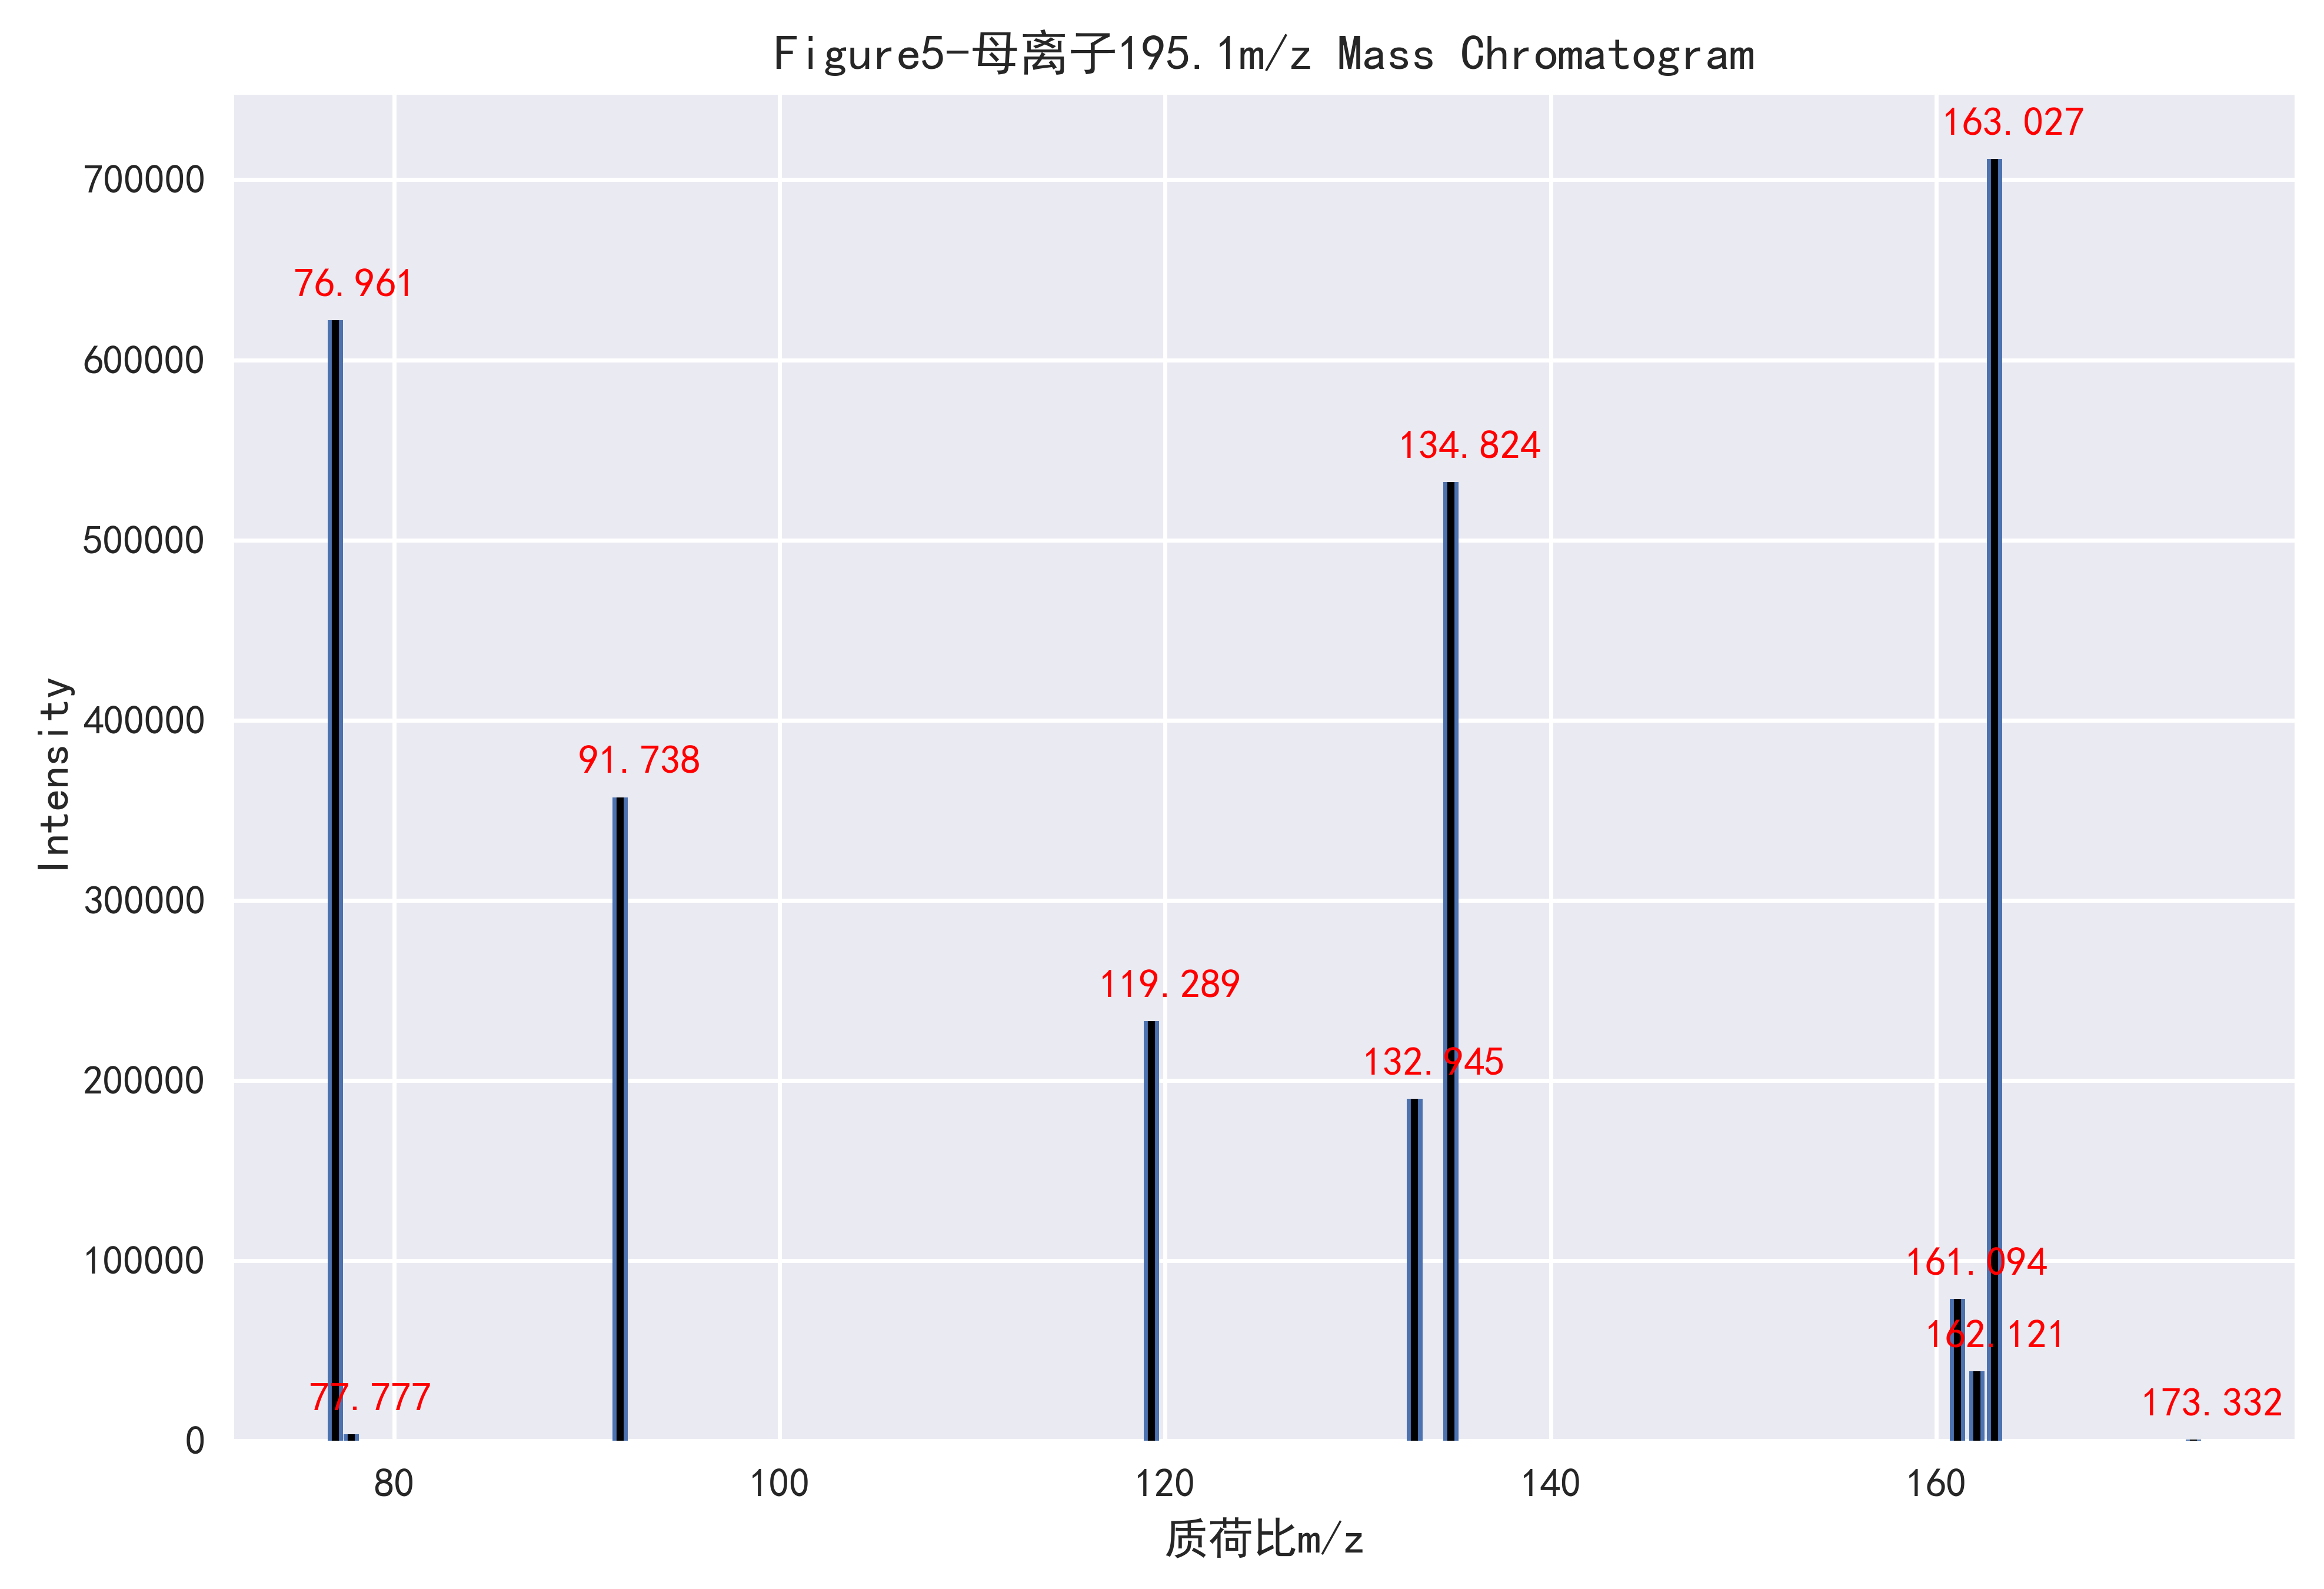

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll


mz=np.arange(70,180)
X=np.loadtxt (r"D:\学习\barca\仪器分析实验\数据\LCMS\lc-ms-F\txt\195MS.txt")
x=X[:,0]
y=X
lines = []
for i, j in zip(x,y):
    pair = [(i, j[0]), (i, j[1])]
    lines.append(pair)
    linecoll = matcoll.LineCollection(lines, colors='k')

fig, ax = plt.subplots(dpi=500)

#plt.plot(x, [i for (i,j) in y],  markersize = 4)
plt.plot(x, [j for (i,j) in y], 'bo', markersize = 0)
ax.add_collection(linecoll)
plt.title("Figure5-279 Mass Chromatogram") #改名字和路径
plt.style.use("seaborn")
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
plt.xlabel("质荷比m/z")
plt.ylabel("Intensity")

fig.tight_layout()  # 全局整理图片尺寸

plt.show()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll


mz=np.arange(70,180)
X=np.loadtxt (r"D:\学习\barca\仪器分析实验\数据\LCMS\lc-ms-F\txt\195MS.txt")
x=X[:,0]
y=X
print("x=",x)
print("y=",y)
lines = []
for i, j in zip(x,y):
    pair = [(i, j[0]), (i, j[1])]
    lines.append(pair)
    linecoll = matcoll.LineCollection(lines, colors='k')
fig, ax = plt.subplots(dpi=500)


#plt.plot(x, [i for (i,j) in y],  markersize = 4)
plt.plot(x, [j for (i,j) in y], 'bo', markersize = 0)
ax.add_collection(linecoll)
plt.title("Figure5-母离子195.1m/z Mass Chromatogram") #改名字和路径
plt.style.use("seaborn")
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
plt.xlabel("质荷比m/z")
plt.ylabel("Intensity")
y=X[:,1]

plt.bar(x,y)
for x,y in zip(x, y):
         plt.text(x+1,y+10000,str(x) ,ha='center',va='bottom',color="red")
fig.tight_layout()  # 全局整理图片尺寸
plt.savefig(r'D:\Desk\Figure5-279 Mass Chromatogram.png')
plt.show()





## 紫外光谱法在线测量连串反应动力学过程

- [↩️](#contents)

In [ ]:
#  紫外光谱法在线测量连串反应动力学过程

import numpy as np
import matplotlib.pyplot as plt
y=np.loadtxt(r"D:\学习\barca\化学信息学\课堂项目CHEMCAM MSL LIBS\data.txt")
time=np.loadtxt(r"D:\学习\barca\仪器分析实验\数据\动力学\X2.txt")
wavelength=np.arange(255,301,1)


#ITTFA类的使用  迭代目标转换因子分析，定性分析
import numpy as np
# 读水解紫外数据
#X=np.loadtxt ("D:\\学习\\barca\\化学信息学\\化学信息学\\仪器联用—高维数据分析\\例子-邻苯二甲酸二甲酯的水解\\shuijie.txt")                  #    "D:\\学习\\barca\\仪器分析实验\\数据\\动力学\\20211122-F\\Y1.txt"
X=np.loadtxt (r"D:\学习\barca\仪器分析实验\数据\动力学\20211122-F\Y11.txt")
X=X.T
#X=X[:,10:50]  #取波长260~300
import numpy as np
import math
class ITTFA:

    T=P=X=None
    recordX=None
    def __init__(self,X):
        self.X=X
        self.recordX=np.arange(X.shape[0])
    def getEigenValueInfo(self):
        B = np.linalg.svd(self.X,full_matrices=False)
        self.lamda=lamda = B[1]
        self.T=B[0]*B[1]
        self.P=B[2].T

        lam=[]
        for i in range(len(lamda)-1):
            lam.append(lamda[i]/lamda[i+1])
        return lam
            
    def PCAdecompose(self,pcs):
        self.T=self.T[:,:pcs]  # 取pcs主成分
        self.P=self.P[:,:pcs]
        self.lamda=self.lamda[:pcs]
        self.pcs=pcs  # 系统的组分数
        
    def needleSearch(self):
        kk=self.T.shape[0]  # 色谱保留时间  采样点数
        nsresult =np.zeros(kk)
        #根据公式   ci = T * ri   ; ri = (T'T).inverse() * T' * ci;
        # 所以  下一个迭代出来的  ci =  T * (T'T).inverse() * T' *  ci;
        # 因此 先求出  T * (T'T).inverse() * T' 可以大大的加快计算的速度
        #让 temp = T * (T'T).inverse() * T';
        
        # 构造 T'T的逆矩阵 temp1,是奇异值的平方  再倒数，再对角化
        
        temp1 =np.diag(1 / self.lamda**2) 
        temp = self.T @ temp1 @ self.T.T
        
        
        colMax=temp.max(axis=0)
        temp=temp/colMax
        I=np.eye(kk)
        temp=temp-I
        error=(temp**2).sum(axis=0)
        nsresult=np.sqrt(error)/np.sqrt(kk-1.0)
        '''
        for i in range(kk):
            c_begin=np.zeros(kk)
            c_begin[i]=1
            c_end = temp.dot(c_begin)
            maxValue=max(c_end)
            c_end = c_end / maxValue
            error =sum( (c_end - c_begin)**2)
            nsresult[i] = math.sqrt(error)/ math.sqrt(kk - 1.0)
        '''    
        minLocation = self.findMinLocation(nsresult)
        return nsresult,minLocation
        
    def findMinLocation(self,nsresult):
        kk=len(nsresult)
        min_time = []
        if nsresult[0] < nsresult[1]:  #判断开始
            min_time.append(self.recordX[0])
        
        
        
        # 以求二阶导数的方法求
        a=nsresult[:-1]
        b=nsresult[1:]
        c=b-a  # 一阶导数
        c[c>0]=1
        c[c<0]=-1
        b=c[1:]
        a=c[:-1]
        c=b-a  # 二阶导数
        ans=np.where(c==2)[0]+1
        min_time.extend(list(ans))
        
        '''
        
        # for 判断中间的极小点
                
        for i in range(1,kk-1):
            if nsresult[i] < nsresult[i - 1] and nsresult[i] < nsresult[i + 1]:
                min_time[j] = self.recordX[i]
                j+=1
        '''       
        if (nsresult[kk-1] < nsresult[kk-2]):  #判断尾部的极小点
            min_time.append(self.recordX[kk-1])
        
        minList = min_time[:self.pcs]   # 找到j个最小点，应该等于组分数啊 
        '''
        for i in range(j):
            minList[i] = min_time[i]
        '''
        return np.array(minList)
            
    def getR(self,minList):
        kk=len(minList)  # 组分数
        if self.T.shape[1] != kk:
            return False
        self.R = np.zeros((kk,kk))
        self.C=np.zeros((self.T.shape[0],kk))
        row = self.T.shape[0]
        c_begin=c_end=error=r=None
        # 求临时矩阵　　T'T的逆　* T'
        temp1 =np.diag(1 / self.lamda**2)  # 这是逆
        temp = temp1.dot(self.T.T)
        for i in range(kk):
            c_begin = np.zeros(row)
            c_begin[int(minList[i])] = 1
            maxPos=int(minList[i])
            count = 0
            while True:
                r = temp.dot(c_begin)
                c_end = self.T.dot(r)
                maxValue =np.max(c_end)
                maxPos=np.argmax(c_end)
                c_end = c_end / maxValue
                c_end[c_end<0]=0 # 不允许负数

                for  k in range(maxPos,0,-1): #从最大点向左,如果发现左边点的值大于右边点的值,强行将其变成和右边一样的值
                    if c_end[k] < c_end[k - 1]:
                        c_end[k - 1] = c_end[k] * 0.99
                        
                for k in range(maxPos,len(c_end)-1,1):  # 从最大点向右,如果发现右边点的值大于左边点的值,强行将其变成和左边一样的值
                    if c_end[k] < c_end[k + 1]:
                        c_end[k + 1] = c_end[k] * 0.99
                        
                error = math.sqrt(np.sum((c_end - c_begin)**2)/row)
                c_begin = c_end
                
               
                count+=1
                if count > 50: 
                    break
                if error<1e-10:
                    break
                
            self.R[:,i]= r
            self.C[:,i]=c_end
                # 得到一列r后,可以计算得到物质的纯色谱, 如果纯光谱也知道,就可以得到一组分的纯2维谱
        return True
    def getCS(self,minList):
        self.getR(minList)
        C = self.T.dot(self.R)
        #C=self.C
        S = np.linalg.inv(self.R).dot(self.P.T)
        #S= np.linalg.inv(C.T @ C) @ C.T @  self.X
        S=S.T
        return C,S
        
def obeyOnePeak(C,minLocation):
    for i in range(C.shape[-1]):
        c_end = C[:,i]
        maxPos=int(minLocation[i])
        for  k in range(maxPos,0,-1): #从最大点向左,如果发现左边点的值大于右边点的值,强行将其变成和右边一样的值
            if c_end[k] < c_end[k - 1]:
                c_end[k - 1] = c_end[k] * 0.99
                
        for k in range(maxPos,len(c_end)-1,1):  # 从最大点向右,如果发现右边点的值大于左边点的值,强行将其变成和左边一样的值
            if c_end[k] < c_end[k + 1]:
                c_end[k + 1] = c_end[k] * 0.99
    

#X=np.loadtxt (r"F:\teach\programTeach\InfoTeach\shuijie.txt")  #读混合物光谱矩阵


'''
X=np.loadtxt (r"gcms模拟.txt")  #读混合物光谱矩阵
X=X[0:60]
ittfa=ITTFA(X)
lamdaInfo=ittfa.getEigenValueInfo()
print("特征值",lamdaInfo)
k=np.argmax(lamdaInfo)+1
#k=int(input('请确定主成分数='))
ittfa.PCAdecompose(k)
nsresult,minLocation=ittfa.needleSearch()
recordX = np.arange(len(X))



import matplotlib.pyplot as plt

plt.plot(recordX,nsresult)
plt.xlabel("position")
plt.ylabel("height ")

plt.show()
print(minLocation)
#minLocation[0]=25
C,S=ittfa.getCS(minLocation)  # ITTFA 计算的结果

print(C.argmax(axis=0))

# X=CS  迭代ALS
size=C.size
Cnew=C
i=0
E=np.eye(C.shape[-1])
while True:
    C=Cnew
    S= np.linalg.inv(C.T @ C+0.01*E) @ C.T @ X
    S[S<0]=0
    Cnew=X @ S.T @ (np.linalg.inv( S @ S.T)+0.01*E)
    Cnew[Cnew<0]=0
#    obeyOnePeak(Cnew,minLocation)
    #err=np.sqrt(np.sum((C-Cnew)**2)/size)
    err=X-C @ S
    err=np.sqrt((err**2).sum()/X.size)
    #print(err)
    if err<1e-6:
        break
    
    i +=1
    if i>2000:
        break

S=S.T
ma=S.max(axis=0)
S =S/ma *1000

C =C*ma  /1000 

x=np.arange(len(C))
for i in range(C.shape[1]):
    plt.plot(x,C[:,i])

plt.xlabel("time")
plt.ylabel("height ")    
plt.show()    

print(C.argmax(axis=0))



x=np.arange(len(S))
# S 归一化
#S=S/S.max(axis=0)
for i in range(S.shape[1]):
    plt.bar(x,S[:,i])
    plt.xlabel("wavelegth")
    plt.ylabel("height ")     

    plt.show()

err=X-C @ S.T
err=np.sqrt((err**2).sum(axis=0)/X.shape[0])
print(err)
'''



'''
orig=np.sqrt((X**2).sum(axis=0)/X.shape[0])
print(orig)
'''

#构造ITTFA算法对象
ittfa=ITTFA(X)
#特征值分析，相邻特征值比值，获取组分数k1
lamdaInfo=ittfa.getEigenValueInfo()  #特征值分析
k=int(input('组分数：'))  #k=3
ittfa.PCAdecompose(k)  #获取有效信息，去掉噪声
nsresult,minLocation=ittfa.needleSearch()  # 针式搜索
#  制作搜索，寻找最小点
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
plt.style.use("seaborn")
#制作针式搜索结果曲线
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体为黑体
fig=plt.figure(figsize=(10,8),dpi=300)#创建全局绘图区


plt.subplot(2, 2, 1)
for i in range(0,43):
    plt.plot(wavelength,X[i,:])
plt.title("Figure1-反应体系的紫外吸收光谱图")
plt.xlabel("Wavelength/nm")
plt.ylabel("Intensity")



plt.subplot(2, 2, 2)
plt.plot(nsresult)
plt.title("Figure2-针式搜索结果曲线")


plt.subplot(2, 2, 3)
C,S=ittfa.getCS(minLocation)  # 获取纯谱CS
plt.plot(time,C)   
plt.title("Figure3-动力学谱图")
plt.xlabel("Time/s")
plt.ylabel("Concentration mol/L")

plt.subplot(2, 2, 4)
plt.plot(wavelength,S)
plt.xlabel("Wavelength/nm")
plt.ylabel("Intensity")
plt.title("Figure4-纯谱图")
plt.tight_layout()     # 调整子图间距


plt.savefig(r'D:\学习\barca\仪器分析实验\数据\动力学\20211122-F\Y11的图.png')
plt.show()





'''
CBBL算法—灰色体系的定量分析  
'''

import numpy as np
import random
# 评估函数
'''
X=X.shape
n=X.size(axis=0)
m=X.size(axis=0)'''
size=X.shape
print(size[0],size[1])  #size[0]行数,size[1]列数
n=size[0]
m=size[1]
#print(m,'\n',n)
def func(X,pcs):  # 矩阵X，提取pcs主成分后残差标准差
    B = np.linalg.svd(X,full_matrices=False)
    err1=B[1][pcs:]
    err=np.sqrt( (err1**2).sum()/(n*m-1)  )
    return err
M=np.loadtxt ("D:\\学习\\barca\\化学信息学\\化学信息学\\仪器联用2\\mix_2混合物.txt")  #混合物矩阵
X=np.loadtxt ("D:\\学习\\barca\\化学信息学\\化学信息学\\仪器联用2\\m1_2组分1.txt")  #组分A谱
B = np.linalg.svd(M,full_matrices=False)
lamda = B[1]
for i in range(len(lamda)-1):
    print(lamda[i]/lamda[i+1])  #确定体系组分数
k=int(input('请确定主成分数='))
x0=1
L=M-X*x0
k=k-1    # 从 L 矩阵求解的特征值数

y0=func(L,k)
count=0
while count<100:
    delta=(random.random()-0.5)/10.0  # 值变化的小一点，避免跳跃
    x1=x0+delta
    L=M-X*x1
    y1=func(L,k)
    if (y1<y0):
        x0=x1;    y0=y1
    print("第",count,"次迭代，","x=",x0,"  y=",y0)
    count +=1

- [↩️](#contents)

## Volcanoes plots

- [↩️](#contents)

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.gridspec as gspec
import matplotlib.pyplot as plt
import outplqparser as opp
from scipy.interpolate import interp1d
def levelinit():
	global level
	level = np.array( [  9.20044434e+02,   7.78800781e+02,   6.59240662e+02,
        	 5.58035156e+02,   4.72366547e+02,   3.99849640e+02,
        	 3.38465424e+02,   2.86504791e+02,   2.42521072e+02,
         	2.05289642e+02,   1.73773941e+02,   1.47096466e+02,
         	1.24514450e+02,   1.05399208e+02,   8.92185135e+01,
         	7.55218353e+01,   6.39278488e+01,   5.41137619e+01,
         	4.58063087e+01,   3.87741966e+01,   3.28216553e+01,
         	2.77829304e+01,   2.35177402e+01,   1.99073410e+01,
         	1.68511982e+01,   1.42642336e+01,   1.20744152e+01,
         	1.02207689e+01,   8.65169525e+00,   7.32350302e+00,
         	6.19920969e+00,   5.24751854e+00,   4.44192934e+00,
         	3.76001072e+00,   3.18278074e+00,   2.69416618e+00,
         	2.28056169e+00,   1.93045413e+00,   1.63409448e+00,
         	1.38323057e+00,   1.17087960e+00,   9.91128385e-01,
         	8.38971794e-01,   7.10174382e-01,   6.01149738e-01,
         	5.08862078e-01,   4.30742532e-01,   3.64615738e-01,
         	3.08640331e-01,   2.61258304e-01,   2.21150517e-01], dtype = float)

def ratemaker(file1,file2):
	levelinit()
	out1 = opp.parser(str(file1))
	out2 = opp.parser(str(file2))
	return out1, out2

def dateextractor(file1, file2, date):
	global o31, o32, prod1, prod2, loss1, loss2, brx1, brx2, clx1, clx2, brxclx1, brxclx2, hox1, hox2, nox1,nox2, ox1, ox2
	o31, prod1, loss1, brx1, brxclx1, clx1, nox1, hox1, ox1 = opp.rxnrates(file1, int(date))
	o32, prod2, loss2, brx2, brxclx2, clx2, nox2, hox2, ox2 = opp.rxnrates(file2, int(date))
	
def latextractor(lat):
	global cclx1, cclx2, nnox1, nnox2, oo31, oo32, oo3num1, oo3num2, bbrx1, bbrx2, bbrxclx1, bbrxclx2, hhox1, hhox2, lloss1, lloss2, pprod1, pprod2, oox1, oox2
	levelinit()
	cclx1 = np.zeros(51,dtype = float)
	cclx2 = np.zeros(51,dtype = float)
	bbrx1 = np.zeros(51,dtype = float)
	bbrx2 = np.zeros(51,dtype = float)
	bbrxclx1 = np.zeros(51,dtype = float)
	bbrxclx2 = np.zeros(51,dtype = float)
	nnox1 = np.zeros(51,dtype = float)
	nnox2 = np.zeros(51,dtype = float)
	hhox1 = np.zeros(51,dtype = float)
	hhox2 = np.zeros(51,dtype = float)
	oox1 = np.zeros(51,dtype = float)
	oox2 = np.zeros(51,dtype = float)
	oo31 = np.zeros(51,dtype = float)
	oo32  = np.zeros(51,dtype = float)
	oo3num1 = np.zeros(51,dtype = float)
	oo3num2 = np.zeros(51, dtype = float)
	pprod1 = np.zeros(51,dtype = float)
	pprod2 = np.zeros(51,dtype = float)
	lloss1 = np.zeros(51,dtype = float)
	lloss2 = np.zeros(51,dtype = float)
	
	for x in range(51):
		cclx1[x] = clx1[x][lat][1]
		cclx2[x] = clx2[x][lat][1]
		nnox1[x] = nox1[x][lat][1]
		nnox2[x] = nox2[x][lat][1]
		oo3num1[x] = o31[x][lat][0]
		oo3num2[x] = o32[x][lat][0]
		oo31[x] = o31[x][lat][1]
		oo32[x] = o32[x][lat][1]
		bbrx1[x] = brx1[x][lat][1]
		bbrx2[x] = brx2[x][lat][1]
		bbrxclx1[x] = brxclx1[x][lat][1]
		bbrxclx2[x] = brxclx2[x][lat][1]
		hhox1[x] = hox1[x][lat][1]
		hhox2[x] = hox2[x][lat][1]
		lloss1[x] = loss1[x][lat][0]
		lloss2[x] = loss2[x][lat][0]
		pprod1[x] = prod1[x][lat][0]
		pprod2[x] = prod2[x][lat][0]
		oox1[x] = ox1[x][lat][1]
		oox2[x] = ox2[x][lat][1]
	interperator()

def interperator():
	global cclx1, cclx2, nnox1, nnox2, oo31, oo32, oo3num1, oo3num2, bbrx1, bbrx2, bbrxclx1, bbrxclx2, hhox1, hhox2, lloss1, lloss2, pprod1, pprod2, oox1, oox2, level
	levelnew = np.linspace(level[0],level[-1], 10000, endpoint = True)
	cclx1 = interp1d(level, cclx1, kind = 5)
	cclx2 = interp1d(level, cclx2, kind = 5)
	nnox1 = interp1d(level, nnox1, kind = 5)
	nnox2 = interp1d(level, nnox2, kind = 5)
	oo3num1 = interp1d(level, oo3num1, kind = 5)
	oo3num2 = interp1d(level, oo3num2, kind = 5)
	oo31 = interp1d(level, oo31, kind = 5)
	oo32 = interp1d(level, oo32, kind = 5)
	bbrx1 = interp1d(level, bbrx1, kind = 5)
	bbrx2 = interp1d(level, bbrx2, kind = 5)
	bbrxclx1 = interp1d(level, bbrxclx1, kind = 5)
	bbrxclx2 = interp1d(level, bbrxclx2, kind = 5)
	hhox1 = interp1d(level, hhox1, kind = 5)
	hhox2 = interp1d(level, hhox2, kind = 5)
	lloss1 = interp1d(level, lloss1, kind = 5)
	lloss2 = interp1d(level, lloss2, kind = 5)
	pprod1 = interp1d(level, pprod1, kind = 5)
	pprod2 = interp1d(level, pprod2, kind = 5)
	oox1 = interp1d(level, oox1, kind = 5)
	oox2 = interp1d(level, oox2, kind = 5)
		
	cclx1 = cclx1(levelnew)
	cclx2 = cclx2(levelnew)
	bbrx1 = bbrx1(levelnew)
	bbrx2 = bbrx2(levelnew)
	nnox1 = nnox1(levelnew)
	nnox2 = nnox2(levelnew)
	hhox1 = hhox1(levelnew)
	hhox2 = hhox2(levelnew)
	oox1 = oox1(levelnew)
	oox2 = oox2(levelnew)
	oo31 = oo31(levelnew)
	oo32 = oo32(levelnew)
	oo3num1 = oo3num1(levelnew)
	oo3num2 = oo3num2(levelnew)
	bbrxclx1 = bbrxclx1(levelnew)
	bbrxclx2 = bbrxclx2(levelnew)
	lloss1 = lloss1(levelnew)
	lloss2 = lloss2(levelnew)
	pprod1 = pprod1(levelnew)
	pprod2 = pprod2(levelnew)
	level = levelnew
	adderator()
		
def plotinit():
	global fig, ax1, ax2, gs
	#define plot
	plt.ion()
	gs = gspec.GridSpec(1,2, wspace = 0.1)
	ax1 = plt.subplot(gs[0,0])
	ax2 = plt.subplot(gs[0,1])
	fig = plt.gcf()
	fig.set_facecolor('white')
	fig.subplots_adjust(bottom = 0.04, left = 0.055, right = 0.98, top = 0.98)
	fig.set_size_inches(6,10.66)

	ax1.set_ylim(1000,1)
	ax1.set_yscale('log')
	ax1.set_xlim(0,1)
	ax1.grid(which = 'both')
	ax2.set_ylim(1000,1)
	ax2.set_yscale('log')
	ax2.set_xlim(0,1)
	ax2.grid(which = 'both')
	ax1.set_xlabel('fractional role of chemical family in ozone loss rate', fontsize = 20)
	ax1.set_ylabel('pressure (hPa)', fontsize = 20)
	ax1.xaxis.set_label_coords(1.05, -0.018)
	ax2.yaxis.set_tick_params(labelleft= "off")

def plotnoratinit():
	global fig, ax1, ax2, gs
	#define plot
	plt.ion()
	gs = gspec.GridSpec(1,2, wspace = 0.1)
	ax1 = plt.subplot(gs[0,0])
	ax2 = plt.subplot(gs[0,1])
	fig = plt.gcf()
	fig.set_facecolor('white')
	fig.subplots_adjust(bottom = 0.04, left = 0.055, right = 0.98, top = 0.98)
	fig.set_size_inches(6,10.66)

	ax1.set_ylim(1000,1)
	ax1.set_yscale('log')
	ax1.grid(which = 'both')
	ax2.set_ylim(1000,1)
	ax2.set_yscale('log')
	ax2.grid(which = 'both')
	ax1.set_ylabel('pressure (hPa)', fontsize = 20)
	ax1.xaxis.set_label_coords(1.05, -0.018)
	ax2.yaxis.set_tick_params(labelleft= "off")

def plotfill(ax, var1, var2, facec, edgec, sign =1):
	global fig, ax1, ax2, gs
	if sign == 1:
		ax.fill_betweenx(level, np.divide(var1, lloss1), np.divide(var2,lloss2), where = np.divide( var1, lloss1) > np.divide(var2,lloss2), facecolor = facec, edgecolor = edgec, alpha = 0.4)
	if sign == -1:
		ax.fill_betweenx(level, np.divide(var1, lloss1), np.divide(var2,lloss2), where = np.divide(var1, lloss1) < np.divide(var2,lloss2), facecolor = facec, edgecolor = edgec, alpha = 0.4)

def plotpercentfill(ax, var1, var2, facec, edgec, sign =1):
	global fig, ax1, ax2, gs 
	if sign == 1:
		ax.fill_betweenx(level, np.divide(var1, np.sum(lloss1)), np.divide(var2,np.sum(lloss2)), where = np.divide( var1, np.sum(lloss1)) > np.divide(var2,np.sum(lloss2)), facecolor = facec, edgecolor = edgec, alpha = 0.4)
	if sign == -1:
		ax.fill_betweenx(level, np.divide(var1, np.sum(lloss1)), np.divide(var2,np.sum(lloss2)), where = np.divide(var1,np.sum(lloss1)) < np.divide(var2,np.sum(lloss2)), facecolor = facec, edgecolor = edgec, alpha = 0.4)

def plotlinedraw(ax, var1, var2, sign =1, levelhigh = 1000, levellow = 1):
	global fig, ax1, ax2, gs
	if sign == 1:
		ax.plot( np.divide(var1[(np.divide(var1,lloss1) > np.divide(var2,lloss2)) & (level > levellow) & (level < levelhigh)],lloss1[(np.divide(var1,lloss1) > np.divide(var2,lloss2)) & (level >levellow) & ( level < levelhigh)]), level[(np.divide(var1,lloss1) > np.divide(var2, lloss2)) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = 'k')
	if sign == -1:
		ax.plot( np.divide(var1[(np.divide(var1,lloss1) < np.divide(var2,lloss2)) & (level > levellow) & (level < levelhigh)],lloss1[(np.divide(var1,lloss1) < np.divide(var2,lloss2)) & (level >levellow) & ( level < levelhigh)]), level[(np.divide(var1,lloss1) < np.divide(var2, lloss2)) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = 'k')


def plotpercentlinedraw(ax, var1, var2, sign =1, levelhigh = 1000, levellow = 1):
	global fig, ax1, ax2, gs
	if sign == 1:
		ax.plot( np.divide(var1[(np.divide(var1,np.sum(lloss1)) > np.divide(var2,np.sum(lloss2))) & (level > levellow) & (level < levelhigh)],np.sum(lloss1)), level[(np.divide(var1,np.sum(lloss1)) > np.divide(var2, np.sum(lloss2))) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = 'k')
	if sign == -1:
		ax.plot( np.divide(var1[(np.divide(var1,np.sum(lloss1)) < np.divide(var2,np.sum(lloss2))) & (level > levellow) & (level < levelhigh)],np.sum(lloss1)), level[(np.divide(var1,np.sum(lloss1)) < np.divide(var2, np.sum(lloss2))) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = 'k')


def plotnoratfill(ax, var1, var2, facec, edgec, sign =1):
	global fig, ax1, ax2, gs
	if sign == 1:
		ax.fill_betweenx(level, var1, var2, where = var1 > var2, facecolor = facec, edgecolor = edgec, alpha = 0.4)
	if sign == -1:
		ax.fill_betweenx(level, var1, var2, where = var1 < var2, facecolor = facec, edgecolor = edgec, alpha = 0.4)


def plotratlinedraw(ax, var1, var2, clr,  sign =1, levelhigh = 1000, levellow = 1):
	global fig, ax1, ax2, gs
	if sign == 1:
		ax.plot(var1[(var1 > var2) & (level > levellow) & (level < levelhigh)], level[(var1 > var2) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = clr)
	if sign == -1:
		ax.plot( var1[(var1 < var2) & (level > levellow) & (level < levelhigh)], level[(var1< var2) & (level > levellow) & (level < levelhigh)], linestyle = 'dashed', linewidth = 2, color = clr)

def adderator():
	global halo1, halo2, bromo1, bromo2
	halo1 = np.add(np.add(cclx1,bbrx1),bbrxclx1)
	halo2 = np.add(np.add(cclx2, bbrx2), bbrxclx2)
	bromo1 = np.add(bbrx1,bbrxclx1)
        bromo2 = np.add(bbrx2, bbrxclx2)

In [ ]:
from __future__ import division
import numpy as np
import re

def parser(filename): #returns np array
	inp = open(filename).readlines()
	timedepth = len(inp)/(55*51*19) #55 lines per entry, 51 levels, 19 lats
	pdepth = 51 #51 pressure levels
	latdepth = 19 #19 latitudes
	#                   z        p         l     y  
	out = np.zeros((timedepth, pdepth, latdepth, 54,2), dtype = 'object')
	counterlist = [] #list of counters
	for x in range(0,len(inp)): #list of linenumbers to read / counters
		if x%55 ==0:
			counterlist.append(int(np.floor(x/55)))
	for x in counterlist:
		for y in range(1,55):
			linenum = (x*55)+y
			if y ==1: #grep indices from header
				p = int(re.search(r"(?<=J=)\s?\w+", inp[linenum]).group()) -1
				l = int(re.search(r"(?<=\I=)\s?\w+", inp[linenum]).group())-1
			    z = np.floor(linenum / (55*51*19))
				out[z,p,l,y-1,0] = float(re.search(r"(?<=\O3=)\-?\s*\d+\.?\d*(?:[Ee]\+\d+)?",inp[linenum]).group())
				out[z,p,l,y-1,1] = float(re.search(r"(?<=\VD=)\-?\s*\d+\.?\d*(?:[Ee]\+\d+)?",inp[linenum]).group())	
			if 1 < y < 54: #grep rates and constants from lines
				out[z,p,l,y-1,0] = float(re.search(r"(?<=RATE=)\s*\+?\-?\s*\d+\.?\d*(?:[Ee]\+?\-?\d+)?",inp[linenum]).group())
				out[z,p,l,y-1,1] = float(re.search(r"(?<=CONC=)\s*\+?\-?\s*\d+\.?\d*(?:[Ee]\+?\-?\d+)?",inp[linenum]).group())
			if y == 54: #grep total ozone rates
				out[z,p,l,y-1,0] = float(re.search(r"(?<=PROD=)\s*\+?\-?\s*\d+\.?\d*(?:[Ee]\+?\-?\d+)?",inp[linenum]).group())
				out[z,p,l,y-1,1] = float(re.search(r"(?<=LOSS=)\s*\+?\-?\s*\d+\.?\d*(?:[Ee]\+?\-?\d+)?",inp[linenum]).group())
	
			
	return out
		
		
def rxnrates(outplq, day): #extracts rate data from output of .parser()

#	for x in range(2,55):
#		match = re.search(r"(?<=BR)", str.split(inp[x])[0]
#		if match:
#			print x-1
	Brrows = [3,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49]
	BrClrows = [38,39]
	Clrows = [2,4,20,21,22,23,24,25,26,27,28,29,30,31,32]
	NOxrows = [5,7,8,9,18,19]
	HOxrows = [6,10,11,12,13,14,15,16,17]
	Oxrows = [1,50]
	O3 = np.zeros((51,19,2), dtype = "object")
	Prod = np.zeros((51,19,2), dtype = "object")
	Loss = np.zeros((51,19,2), dtype = "object")
	Brx = np.zeros((51,19,2), dtype = "object")
	BrxClx = np.zeros((51,19,2), dtype = "object")
	Clx = np.zeros((51,19,2), dtype = "object")
	NOx = np.zeros((51,19,2), dtype = "object")
	HOx = np.zeros((51,19,2), dtype = "object")
	Ox = np.zeros((51,19,2), dtype = "object")
	
		
	for level in range(len(outplq[day])):
		for lat in range(len(outplq[day][level])):
			O3[level][lat][0] = outplq[day][level][lat][0][0] #number density of O3
			O3[level][lat][1] = np.divide(outplq[day][level][lat][0][0], outplq[day][level][lat][0][1]) #mixing ratio of O3
			Prod[level][lat][0] = outplq[day][level][lat][53][0] 
			Loss[level][lat][0] = outplq[day][level][lat][53][1]	
			Brx[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in Brrows]) #for the following [0] is rate
			Brx[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in Brrows if outplq[day][level][lat][x][1] < 0]) #for the following [1] is rate*conc
			BrxClx[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in BrClrows])
			BrxClx[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in BrClrows if outplq[day][level][lat][x][1] < 0])
			Clx[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in Clrows])
			Clx[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in Clrows if outplq[day][level][lat][x][1] < 0])
			NOx[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in NOxrows])
			NOx[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in NOxrows if outplq[day][level][lat][x][1] < 0])
			HOx[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in HOxrows])
			HOx[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in HOxrows if outplq[day][level][lat][x][1] < 0])
			Ox[level][lat][0] = np.sum([np.sum(outplq[day][level][lat][x][0] ) for x in Oxrows])
			Ox[level][lat][1] = np.sum([np.sum(outplq[day][level][lat][x][1] ) for x in Oxrows if outplq[day][level][lat][x][1] < 0])
	return O3, Prod, Loss, Brx, BrxClx, Clx, NOx, HOx, Ox
		

==wtf== amazed

In [ ]:
"""
2D gravity based simulation of volcanic activity on one of Jupiter's
moons. Visualisation plots the particle paths of different molecules
ejected by the volcano.
"""
import sys
import math
import random
import pygame as pg

pg.init()  # initialse pygame

# define colour table
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
LT_GREY = (180, 180, 180)
GREY = (120, 120, 120)
DK_GREY = (80, 80, 80)


class Particle(pg.sprite.Sprite):
    """Build ejecta particles for volcano simulation."""

    # Define constants and dictionary containing colour tuples
    gases_colours = {'SO2': LT_GREY, 'CO2': GREY, 'H2S': DK_GREY, 'H2O': WHITE}
    VENT_LOCATION_XY = (320, 300)
    IO_SURFACE_Y = 308
    GRAVITY = 0.5  # pixels per frame; added to dy each game loop
    VELOCITY_SO2 = 8  # pixels per frame

    # scalar (SO2 atomic weight/particle atomic weight) used for velocity
    vel_scalar = {'SO2': 1, 'CO2': 1.45, 'H2S': 1.9, 'H2O': 3.6}

    def __init__(self, screen, background):
        super().__init__()

        # define class attributes
        self.screen = screen
        self.background = background
        self.image = pg.Surface((4, 4))
        self.rect = self.image.get_rect()

        # randomly choose a gas for each particle
        self.gas = random.choice(list(Particle.gases_colours.keys()))
        self.colour = Particle.gases_colours[self.gas]

        # scale particles velocity
        self.vel = Particle.VELOCITY_SO2 * Particle.vel_scalar[self.gas]

        # define starting position and calculate its vector
        self.x, self.y = Particle.VENT_LOCATION_XY
        self.vector()

    def vector(self):
        """Calculate particle vector at launch."""

        # choose an angle at random and calculate vector in x and y directions
        orientation = random.uniform(60, 120)  # 90 is vertical
        radians = math.radians(orientation)
        self.dx = self.vel * math.cos(radians)
        self.dy = -self.vel * math.sin(radians)

    def update(self):
        """Apply gravity, draw a path, and handle boundary conditions"""

        # include effect of gravity by adding to change in y
        self.dy += Particle.GRAVITY
        # draw a line between the old and new position
        pg.draw.line(self.background, self.colour, (self.x, self.y),
                     (self.x + self.dx, self.y + self.dy))

        self.x += self.dx
        self.y += self.dy

        # remove particle if it leaves the screen or passes the set y position
        if self.x < 0 or self.x > self.screen.get_width():
            self.kill()

        if self.y < 0 or self.y > Particle.IO_SURFACE_Y:
            self.kill()


def main():
    """Set up and run game screen and loop."""
    # create pygame surface and load the image file
    screen = pg.display.set_mode((639, 360))
    pg.display.set_caption('IO Volcano Simulator')
    background = pg.image.load('tvashtar_plume.gif')

    # set up colour coded legend
    legend_font = pg.font.SysFont('None', 24)
    water_label = legend_font.render('--- H20', True, WHITE, BLACK)
    h2s_label = legend_font.render('--- H2S', True, DK_GREY, BLACK)
    co2_label = legend_font.render('--- CO2', True, GREY, BLACK)
    so2_label = legend_font.render('--- SO2/S2', True, LT_GREY, BLACK)

    # create sprite gorup to manage all the particles
    particles = pg.sprite.Group()
    clock = pg.time.Clock()

    while True:
        clock.tick(25)  # frame rate
        particles.add(Particle(screen, background))
        for event in pg.event.get():
            if event.type == pg.QUIT:
                # end game if user closes window
                pg.quit()
                sys.exit()

        # draw labels and background image
        screen.blit(background, (0, 0))
        screen.blit(water_label, (40, 20))
        screen.blit(h2s_label, (40, 40))
        screen.blit(co2_label, (40, 60))
        screen.blit(so2_label, (40, 80))

        # update and draw particles
        particles.update()
        particles.draw(screen)
        pg.display.flip()


if __name__ == '__main__':
    main()